## Predicting Acute Kidney Injury in ICU Patients: A Machine Learning Approach to Assess Nephrotoxic Drug Exposure Using MIMIC-IV


## Objective

To construct a machine learning–based risk prediction model for Acute Kidney Injury (AKI) in ICU patients, with a focus on evaluating the impact of nephrotoxic drug exposure using real-world electronic health record data from MIMIC-IV.


## ***Project Outline

## **Step 1: Cohort Definition
ICU Stay Data Extraction: I started by extracting the ICU patient records from the mimiciv_icu.icustays table, which provided information on each ICU stay such as the subject_id, hadm_id, stay_id, and the critical timestamps — intime and outtime. These timestamps marked the time of patient admission and discharge from the ICU, which were crucial for defining the exposure window.

Filter for Adult Patients: I merged the ICU data with the mimiciv_hosp.patients table to obtain patient demographic information, particularly focusing on the age of each patient. I applied a filter to select only adult patients (i.e., those with an anchor_age of 18 years or older).

Age Grouping and Gender Binarization: To aid in further analysis, I categorized the patients into age groups (e.g., 10-19, 20-29, etc.) and binarized the gender variable where male patients were assigned a value of 1 and female patients a value of 0.

## **Step 2: Identification of Nephrotoxic Exposure
Identification of Nephrotoxic Drugs: I compiled a list of nephrotoxic drugs that are commonly associated with kidney injury in clinical settings. **The list included: Vancomycin, Gentamicin, Tobramycin, Amikacin, Amphotericin, Cisplatin, Contrast agents, Ibuprofen, Ketorolac, and Naproxen.**

Extracting Nephrotoxic Drug Prescriptions: then queried the database to identify all prescriptions for the nephrotoxic drugs listed above. The query pulled the drug prescription details including the subject_id, hadm_id, starttime, stoptime, and the drug name, ensuring I captured the relevant exposure window during each patient's ICU stay.

Merging Drug Exposure with ICU Data: After extracting the drug prescriptions, I merged the drug exposure data with the ICU stay data using the subject_id and hadm_id as common keys. This allowed me to track the exact period during which patients were exposed to nephrotoxic drugs while they were in the ICU. filtered the data to include only those drug exposures that occurred within the ICU stay (starttime within the intime and outtime).

Nephrotoxic Exposure Flag: created a binary flag indicating whether or not each patient received a nephrotoxic drug during their ICU stay. This flag was set to 1 if the patient was exposed to a nephrotoxic drug and 0 if not.

## **Step 3: Definition of AKI Outcome
AKI Definition Based on KDIGO Criteria: To define Acute Kidney Injury (AKI), I used the KDIGO criteria, which are widely accepted in clinical practice:

**A 1.5x increase in baseline serum creatinine within 7 days, or**
**A 0.3 mg/dL increase in creatinine within 48 hours.**

Baseline and Post-Exposure Creatinine Levels: I utilized data from the labevents table to extract creatinine values, specifically for baseline and post-exposure levels. I used the charttime field to track the timing of creatinine measurements.

Exposure Window for AKI Detection: The exposure window for detecting AKI was defined as 7 days from the start of nephrotoxic drug administration. This meant that the impact of the nephrotoxic drug on kidney function was monitored over the 7-day period following the start of the drug.

Application of KDIGO Logic: I implemented the KDIGO logic to identify AKI by calculating the changes in creatinine levels within the defined 7-day exposure window. If the creatinine increase met the defined thresholds (either a 1.5x increase or a 0.3 mg/dL increase), the patient was labeled as having AKI.

Final AKI Labeling: I applied this KDIGO logic to each patient’s ICU stay, and assigned a binary label: 1 for AKI and 0 for no AKI. This was done for each patient within the 7-day exposure window.

## **Step 4: Feature Engineering
Objective: To extract relevant features that could improve the model’s performance in predicting Acute Kidney Injury (AKI) following nephrotoxic drug exposure.

Drug-Related Features:
I created several variables based on nephrotoxic drug exposure:
Total dose of nephrotoxic drugs: This was calculated by summing the total dose administered to each patient during their ICU stay.
Exposure duration: The duration of each nephrotoxic drug exposure was derived from the difference between starttime and stoptime for each prescription.
Count of nephrotoxic drugs: A count of how many different nephrotoxic drugs were administered to each patient during their ICU stay.

Laboratory Features:
I derived baseline creatinine levels and peak creatinine levels after drug exposure to assess kidney function. These measurements were captured from the labevents table, which includes creatinine levels taken over time during the ICU stay.

Comorbidity Features:
included the following comorbidities based on ICD codes from the diagnoses_icd table: Diabetes,Hypertension,Sepsis,Heart failure,Liver disease.
Each of these comorbidities was converted into a binary feature (1 if the patient had the comorbidity, 0 if not).

Vital Signs Features:
included vital signs such as Systolic Blood Pressure (BP), Mean Arterial Pressure (MAP), and Urine Output to assess their impact on kidney function. These variables were derived from the chartevents table, which captures real-time vital measurements during ICU stays.

Demographic Features:
I also included demographic information:
Age: Categorized into age groups (e.g., 10-19, 20-29, etc.).
Sex: Binarized (1 for male, 0 for female).

## **Step 5: Model Development
Objective: To develop a predictive model for AKI based on the features extracted in Step 4.

Data Splitting:
I split the dataset into training and testing sets using an 80/20 split, ensuring that the distribution of AKI cases was preserved in both sets through stratification.
This stratification ensured that the model was trained and tested on similar distributions of positive and negative AKI cases.

Model Selection:

I experimented with several machine learning algorithms to identify the best model for predicting AKI:
Logistic Regression: A baseline linear model to assess the relationship between features and the probability of AKI.
Random Forest: An ensemble model to capture complex interactions between features and handle non-linearity.
XGBoost: A gradient boosting model known for handling large datasets and providing high predictive accuracy.
LGBMClassifier: A light version of gradient boosting, optimized for speed and accuracy.
GradientBoostingClassifier: Another form of boosting that creates strong predictive models through iterative learning.

Model Training:

I trained the models using the training set (X_train and y_train) and applied cross-validation to avoid overfitting and ensure the model’s robustness.

Hyperparameter Tuning was performed using GridSearchCV, where the best model hyperparameters were selected based on ROC-AUC as the performance metric.

Addressing Class Imbalance:
Given that AKI is a rare outcome (with a much higher number of non-AKI cases), I used SMOTE  to handle class imbalance. SMOTE generated synthetic data points for the minority class (AKI cases), ensuring that the model was not biased towards predicting the majority class (non-AKI cases).

## **Step 6: Model Evaluation
Objective: To assess the performance of the trained models and identify the best-performing model.
Performance Metrics: I evaluated the models using a variety of performance metrics:
    
    Accuracy: The proportion of correct predictions made by the model.
    F1-Score: The harmonic mean of precision and recall, useful when dealing with imbalanced datasets like this one.
    ROC-AUC: The Area Under the Receiver Operating Characteristic Curve, which gives insight into the model’s ability to discriminate between classes.
    Precision, Recall, Sensitivity, and Specificity: These metrics help in understanding the trade-off between false positives and false negatives, which is critical in a clinical setting.
    R2: To assess how well the model explains the variance in the data (though this is more relevant for regression models).
    RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error): These metrics help to evaluate how well the model’s predictions align with actual observations.

Interpretability:
    I used SHAP (SHapley Additive exPlanations) to explain the model’s predictions and identify the most important features influencing AKI risk.
    
    Feature Importance plots were also generated for models like Random Forest and XGBoost to highlight which features had the greatest impact on predicting AKI.

Calibration:
To assess the reliability of predicted probabilities, I used calibration curves and Brier Score Loss. Calibration curves help determine if predicted probabilities are consistent with the actual outcomes, while the Brier score quantifies the prediction error.

Confusion Matrix:
visualized confusion matrices for each model to understand how well each model distinguished between true AKI cases and non-AKI cases, with a focus on minimizing false positives and false negatives.

Model Comparison:
After evaluating each model, I compared their performance across all metrics and selected the best-performing model, which was used for final predictions and clinical interpretation.

## **Step7:report


## Environment Setup and Database Connection**

In [28]:
import pandas as pd
import psycopg2
from datetime import timedelta
import numpy as np


# Connect to MIMIC-IV DB
conn = psycopg2.connect(host='localhost', port='5432', database='mimiciv')

## Step 1: Cohort Definition

In [31]:
#Step 1.1: ICU Stays
# Query to extract ICU stay details
query_icu = """
SELECT subject_id, hadm_id, stay_id, intime, outtime
FROM mimiciv_icu.icustays;
"""
icu_df = pd.read_sql_query(query_icu, conn)
icu_df['intime'] = pd.to_datetime(icu_df['intime'])
icu_df['outtime'] = pd.to_datetime(icu_df['outtime'])
print(icu_df.head())

/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/492286632.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  icu_df = pd.read_sql_query(query_icu, conn)


   subject_id   hadm_id   stay_id              intime             outtime
0    10000032  29079034  39553978 2180-07-23 14:00:00 2180-07-23 23:50:47
1    10000690  25860671  37081114 2150-11-02 19:37:00 2150-11-06 17:03:17
2    10000980  26913865  39765666 2189-06-27 08:42:00 2189-06-27 20:38:27
3    10001217  24597018  37067082 2157-11-20 19:18:02 2157-11-21 22:08:00
4    10001217  27703517  34592300 2157-12-19 15:42:24 2157-12-20 14:27:41


In [33]:
#Step 1.2: Filter to Adult Patients

# Query to extract patient demographics
query_demo = """
SELECT subject_id, anchor_age, gender
FROM mimiciv_hosp.patients;
"""
demo_df = pd.read_sql_query(query_demo, conn)
demo_df = demo_df[demo_df['anchor_age'] >= 18]  #adult patients

# Merge ICU stays with patient demographics
icu_df = icu_df.merge(demo_df, on='subject_id', how='inner')

# Binarize gender and create age groups 
icu_df['gender'] = icu_df['gender'].map({'M': 1, 'F': 0})  # Male = 1, Female = 0
icu_df['age_group'] = pd.cut(icu_df['anchor_age'], bins=range(10, 101, 10), right=False, labels=[f"{i}-{i+9}" for i in range(10, 100, 10)])
print(icu_df.head())



   subject_id   hadm_id   stay_id              intime             outtime  \
0    10000032  29079034  39553978 2180-07-23 14:00:00 2180-07-23 23:50:47   
1    10000690  25860671  37081114 2150-11-02 19:37:00 2150-11-06 17:03:17   
2    10000980  26913865  39765666 2189-06-27 08:42:00 2189-06-27 20:38:27   
3    10001217  24597018  37067082 2157-11-20 19:18:02 2157-11-21 22:08:00   
4    10001217  27703517  34592300 2157-12-19 15:42:24 2157-12-20 14:27:41   

   anchor_age  gender age_group  
0          52       0     50-59  
1          86       0     80-89  
2          73       0     70-79  
3          55       0     50-59  
4          55       0     50-59  


/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/2649052699.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demo_df = pd.read_sql_query(query_demo, conn)


## Step 2: Identification of Nephrotoxic Drug Exposure

In [36]:
## 2.1: Extract Nephrotoxic Drug Prescriptions

# List of nephrotoxic drugs
nephrotoxic_drugs = [
    'vancomycin', 'gentamicin', 'tobramycin', 'amikacin', 'amphotericin',
    'cisplatin', 'contrast', 'ibuprofen', 'ketorolac', 'naproxen'
]

# query to extract nephrotoxic drug prescriptions from the database
query_rx = f"""
SELECT subject_id, hadm_id, starttime, stoptime, drug, route
FROM mimiciv_hosp.prescriptions
WHERE {" OR ".join([f"drug ILIKE '%{drug}%'" for drug in nephrotoxic_drugs])};
"""
drug_df = pd.read_sql_query(query_rx, conn)

# Convert starttime and stoptime to datetime
drug_df['starttime'] = pd.to_datetime(drug_df['starttime'])
drug_df['stoptime'] = pd.to_datetime(drug_df['stoptime'])
print(drug_df.head())

# 2.2: Merge Nephrotoxic Exposure with ICU Data
merged_df = pd.merge(drug_df, icu_df, on=['subject_id', 'hadm_id'], how='inner')

# Filter to include only drug exposures during the ICU stay
merged_df = merged_df[(merged_df['starttime'] >= merged_df['intime']) & (merged_df['starttime'] <= merged_df['outtime'])]

# Check merged data
print(merged_df.head())

# 2.4: Add Nephrotoxic Exposure Flag
merged_df['nephrotoxic_exposure'] = merged_df['drug'].apply(
    lambda x: 1 if any(drug.lower() in x.lower() for drug in nephrotoxic_drugs) else 0
)
print(merged_df[['subject_id', 'hadm_id', 'drug', 'nephrotoxic_exposure']].head())


/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/147041072.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drug_df = pd.read_sql_query(query_rx, conn)


   subject_id   hadm_id           starttime            stoptime        drug  \
0    10007795  25135483 2136-05-10 08:00:00 2136-05-10 08:00:00  Vancomycin   
1    10000560  28979390 2189-10-16 10:00:00 2189-10-17 19:00:00   Ketorolac   
2    10000690  23280645 2150-09-21 08:00:00 2150-09-24 11:00:00  Vancomycin   
3    10000690  23280645 2150-09-24 08:00:00 2150-09-24 18:00:00  Vancomycin   
4    10000690  25860671 2150-11-09 08:00:00 2150-11-08 10:00:00  Vancomycin   

  route  
0    IV  
1    IV  
2    IV  
3    IV  
4    IV  
    subject_id   hadm_id           starttime            stoptime        drug  \
6     10000690  25860671 2150-11-03 08:00:00 2150-11-08 10:00:00  Vancomycin   
7     10000690  25860671 2150-11-03 08:00:00 2150-11-08 10:00:00  Vancomycin   
8     10000690  25860671 2150-11-03 08:00:00 2150-11-08 10:00:00  Vancomycin   
9     10000690  25860671 2150-11-06 08:00:00 2150-11-08 10:00:00  Vancomycin   
10    10000690  25860671 2150-11-06 08:00:00 2150-11-08 10:00:00 

## Step 3: Define AKI Outcome (Based on KDIGO Criteria)

KDIGO Definition of AKI:

AKI is diagnosed by any of the following:

Increase in serum creatinine by ≥0.3 mg/dL within 48 hours, OR

Increase in serum creatinine to ≥1.5× baseline, which is known or presumed to have occurred within the prior 7 days,

Kidney Disease: Improving Global Outcomes (KDIGO) Acute Kidney Injury Work Group. (2012). KDIGO clinical practice guideline for acute kidney injury. Kidney International Supplements, 2(1), 1–138.

In [52]:
import pandas as pd
import numpy as np
from datetime import timedelta
import psycopg2

# 0. Load creatinine lab data (itemid = 50912) from MIMIC-IV database
conn = psycopg2.connect( host='localhost', port='5432', database='mimiciv')

query = """
SELECT subject_id, hadm_id, charttime, valuenum AS creatinine, itemid
FROM mimiciv_hosp.labevents
WHERE itemid = 50912 AND valuenum IS NOT NULL
"""
lab_df = pd.read_sql(query, conn)
lab_df['charttime'] = pd.to_datetime(lab_df['charttime'])

# 1. Define the KDIGO AKI detection function
def kdigo_fast_optimized(df):
    df = df.sort_values('charttime')

    df['creatinine_shift_48h'] = df['creatinine'].shift(-1)
    df['creatinine_shift_7d'] = df['creatinine'].shift(-7)

    df['creatinine_diff_48h'] = df['creatinine_shift_48h'] - df['creatinine']
    df['creatinine_ratio_7d'] = df['creatinine_shift_7d'] / df['creatinine']

    df['aki_label'] = np.where((df['creatinine_diff_48h'] >= 0.3) |
                               (df['creatinine_ratio_7d'] >= 1.5), 1, 0)

    return df.drop(columns=[
        'creatinine_shift_48h', 'creatinine_shift_7d',
        'creatinine_diff_48h', 'creatinine_ratio_7d'
    ])

# 2. Prepare creatinine dataframe
cr_df = lab_df[['subject_id', 'hadm_id', 'charttime', 'creatinine']].copy()

# 3. Define AKI detection window = 7 days from drug start
merged_df['exposure_window_start'] = merged_df['starttime']
merged_df['exposure_window_end'] = merged_df['starttime'] + timedelta(days=7)

# 4. Merge creatinine with drug exposure window
cr_window = cr_df.merge(
    merged_df[['subject_id', 'hadm_id', 'stay_id', 'exposure_window_start', 'exposure_window_end']],
    on=['subject_id', 'hadm_id'],
    how='inner'
)

# 5. Filter creatinine labs to fall within the 7-day window
cr_window = cr_window[
    (cr_window['charttime'] >= cr_window['exposure_window_start']) &
    (cr_window['charttime'] <= cr_window['exposure_window_end'])
]

# 6. Apply KDIGO logic per stay_id
aki_flags = cr_window.groupby('stay_id').apply(kdigo_fast_optimized).reset_index(drop=True)

# 7. Summarize: label AKI = 1 if any AKI detected in stay
aki_summary = aki_flags.groupby(['subject_id', 'hadm_id', 'stay_id'])['aki_label'].max().reset_index()

# 8. Merge back into main dataset
merged_df = pd.merge(merged_df, aki_summary, on=['subject_id', 'hadm_id', 'stay_id'], how='left')

# 9. Fill missing values with 0 (no AKI detected)
merged_df['aki_label'] = merged_df['aki_label'].fillna(0).astype(int)

# 10. Preview output
print(merged_df[['subject_id', 'hadm_id', 'stay_id', 'aki_label']].head())

/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/2675181636.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lab_df = pd.read_sql(query, conn)


   subject_id   hadm_id   stay_id  aki_label
0    10000690  25860671  37081114          1
1    10000690  25860671  37081114          1
2    10000690  25860671  37081114          1
3    10000690  25860671  37081114          1
4    10000690  25860671  37081114          1


/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/2675181636.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aki_flags = cr_window.groupby('stay_id').apply(kdigo_fast_optimized).reset_index(drop=True)


In [54]:
# Checking the number of patients with 0 and 1 in the 'aki_label' 
aki_counts = merged_df['aki_label'].value_counts()
aki_counts

aki_label
0    189570
1    133320
Name: count, dtype: int64

In [56]:
# Select a random row for each patient (per subject_id, hadm_id)
random_patient_df = merged_df.groupby(['subject_id', 'hadm_id']).apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)
print(random_patient_df[['subject_id', 'hadm_id', 'aki_label']].head())

   subject_id   hadm_id  aki_label
0    10000690  25860671          1
1    10001725  25563031          0
2    10001843  26133978          0
3    10001884  26184834          0
4    10002013  23581541          0


/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/3513619207.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_patient_df = merged_df.groupby(['subject_id', 'hadm_id']).apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)


## **Step 4: Feature Engineering

In [58]:
# 4.1: Medication Features - Nephrotoxic Drugs Exposure
# List of nephrotoxic drugs categorized by class
nephrotoxic_categories = {
    'antibiotics': ['Vancomycin','Vancomycin Enema' ,'Gentamicin Sulfate',
                    'Vancomycin Oral Liquid', 'Tobramycin Sulfate', 'amikacin'],
    'anti_fungals': ['amphotericin'],
    'chemotherapeutic_agents': ['cisplatin'],
    'NSAIDs': ['Ibuprofen Suspension', 'Ibuprofen','Ketorolac', 'Naproxen'],
    'other':['other']
}
for category, drugs in nephrotoxic_categories.items():
    random_patient_df[category] = random_patient_df['drug'].apply(
        lambda x: 1 if isinstance(x, str) and any(drug.lower() in x.lower() for drug in drugs) else 0
    )

print(random_patient_df[['subject_id', 'hadm_id'] + list(nephrotoxic_categories.keys())].head())

   subject_id   hadm_id  antibiotics  anti_fungals  chemotherapeutic_agents  \
0    10000690  25860671            1             0                        0   
1    10001725  25563031            0             0                        0   
2    10001843  26133978            1             0                        0   
3    10001884  26184834            1             0                        0   
4    10002013  23581541            0             0                        0   

   NSAIDs  other  
0       0      0  
1       1      0  
2       0      0  
3       0      0  
4       1      0  


In [61]:
# 4.2: Extract Lab Values 
query_labs = """
SELECT subject_id, hadm_id, charttime, itemid, valuenum AS lab_value
FROM mimiciv_hosp.labevents
WHERE itemid IN (50906, 50983, 50971, 50882, 50931, 50935, 50936, 50937)
"""
labs_df = pd.read_sql_query(query_labs, conn)

# Convert charttime to datetime
labs_df['charttime'] = pd.to_datetime(labs_df['charttime'])

# Map itemid to specific lab names for clarity
lab_itemid_map = {
    50906: 'bun',
    50983: 'sodium',
    50971: 'potassium',
    50882: 'bicarbonate',
    50931: 'chloride',
    50935: 'glucose',
    50936: 'calcium',
    50937: 'magnesium'
}

# Create a new column for each lab
labs_df['lab_name'] = labs_df['itemid'].map(lab_itemid_map)

# Pivot the dataframe to separate lab values by lab name
labs_wide_df = labs_df.pivot_table(
    index=['subject_id', 'hadm_id'], 
    columns='lab_name', 
    values='lab_value', 
    aggfunc='first'
).reset_index()

random_patient_df = pd.merge(random_patient_df, labs_wide_df, on=['subject_id', 'hadm_id'], how='left')

/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/2154734581.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  labs_df = pd.read_sql_query(query_labs, conn)


In [63]:
# 4.3: Extract Vital Signs 
query_vitals = """
SELECT subject_id, hadm_id, charttime, itemid, valuenum AS vital_sign
FROM mimiciv_icu.chartevents
WHERE itemid IN (220052, 220045, 223761, 226559)
"""
vitals_df = pd.read_sql_query(query_vitals, conn)

# Convert charttime to datetime
vitals_df['charttime'] = pd.to_datetime(vitals_df['charttime'])

# Map itemid to specific vital names for clarity
vital_itemid_map = {
    220052: 'map',
    220045: 'heart_rate',
    223761: 'temperature',
    226559: 'urine_output'
}

# Create a new column for each vital sign
vitals_df['vital_name'] = vitals_df['itemid'].map(vital_itemid_map)

# Pivot the dataframe to separate vital signs by vital name
vitals_wide_df = vitals_df.pivot_table(
    index=['subject_id', 'hadm_id'], 
    columns='vital_name', 
    values='vital_sign', 
    aggfunc='first'
).reset_index()

random_patient_df = pd.merge(random_patient_df, vitals_wide_df, on=['subject_id', 'hadm_id'], how='left')

/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/906459419.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vitals_df = pd.read_sql_query(query_vitals, conn)


In [65]:
# 4.4: Comorbidities 
query_comorb = """
SELECT subject_id, hadm_id, icd_code
FROM mimiciv_hosp.diagnoses_icd;
"""
comorb_df = pd.read_sql_query(query_comorb, conn)

# Define comorbidity flags using ICD codes
comorb_flags = {
    'ckd': ['585', 'N18'],  # Chronic Kidney Disease
    'diabetes': ['250', 'E11'],  # Diabetes
    'liver_disease': ['571', 'K70', 'K71', 'K72'],  # Liver Disease
    'heart_failure': ['428', 'I50'],  # Heart Failure
    'hypertension': ['I10', 'I11', 'I12', 'I13', 'I15'],  # Hypertension
    'sepsis': ['A41'],  # Sepsis
    'frailty': ['R54', 'Z91', 'Z74']  # Frailty Index
}

# Create binary columns for each comorbidity
for name, codes in comorb_flags.items():
    comorb_df[name] = comorb_df['icd_code'].apply(lambda x: int(any(code in x for code in codes)))

# Merge comorbidity data back to the main dataset
comorb_summary = comorb_df.groupby(['subject_id', 'hadm_id'])[list(comorb_flags.keys())].max().reset_index()
random_patient_df = pd.merge(random_patient_df, comorb_summary, on=['subject_id', 'hadm_id'], how='left')

random_patient_df[list(comorb_flags.keys())] = random_patient_df[list(comorb_flags.keys())].fillna(0)

/var/folders/3_/0cs1sd196_scl_z87dl52tv80000gn/T/ipykernel_1396/3093617251.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  comorb_df = pd.read_sql_query(query_comorb, conn)


In [67]:
random_patient_df.columns

Index(['subject_id', 'hadm_id', 'starttime', 'stoptime', 'drug', 'route',
       'stay_id', 'intime', 'outtime', 'anchor_age', 'gender', 'age_group',
       'nephrotoxic_exposure', 'exposure_window_start', 'exposure_window_end',
       'aki_label', 'antibiotics', 'anti_fungals', 'chemotherapeutic_agents',
       'NSAIDs', 'other', 'bicarbonate', 'bun', 'chloride', 'glucose',
       'potassium', 'sodium', 'heart_rate', 'map', 'temperature', 'ckd',
       'diabetes', 'liver_disease', 'heart_failure', 'hypertension', 'sepsis',
       'frailty'],
      dtype='object')

In [69]:
random_patient_df.head(3)

,subject_id,hadm_id,starttime,stoptime,drug,route,stay_id,intime,outtime,anchor_age,...,heart_rate,map,temperature,ckd,diabetes,liver_disease,heart_failure,hypertension,sepsis,frailty
0,10000690,25860671,2150-11-03 08:00:00,2150-11-08 10:00:00,Vancomycin,IV,37081114,2150-11-02 19:37:00,2150-11-06 17:03:17,86,...,69.0,NaN,97.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10001725,25563031,2110-04-11 18:00:00,2110-04-12 17:00:00,Ketorolac,IV,31205490,2110-04-11 15:52:22,2110-04-12 23:59:56,46,...,82.0,NaN,98.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10001843,26133978,2134-12-05 20:00:00,2134-12-06 08:00:00,Vancomycin,IV,39698942,2134-12-05 18:50:03,2134-12-06 14:38:26,73,...,129.0,NaN,97.6,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [71]:
from summarytools import dfSummary
summary = dfSummary(random_patient_df)
print(summary)

In [73]:
dfSummary(random_patient_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,subject_id[int64],Mean (sd) : 14999988.6 (2884023.1)min < med < max:10000690.0 < 14999328.0 < 19999840.0IQR (CV) : 5002667.0 (5.2),"31,251 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmUlEQVR4nO3Yu47aUBRG4X24motscQl0NClHSoFEwwOkzMPmEQaJIjVFmlR0SAiBcAZhDGmClCIC7BMg/2h97czxNvY62MKdTicD/neFZ58AcIvSPQ/unKuZWcXjEPvT6fT2r84Huu4WqnOu1ul0voRh2Mp7jM1ms3LOfc0T6zM3iedsNudf3PMbtRKGYWs8Hr9FUbTLuni9XgfT6bS1XC4rZpbpxj1zk/jO9tmc5/mWf5MUzOyYc63v+osb9K6PfjOzKIp2vV7vZ561aZqGZhY657IuDZvNZm88Hm/ybpLJZNJbLpdd59zmUbM955qZBe12+3MURY2sC9M0Lcdx/LHZbP4oFArJo9df26BXQ/XYoeHxeCznWGdmZnEcl5Mk+TQYDIrFYjHTDU+SJEjT9KVarb7m2STPmu0z9zzbzF5Go9G3brebKfT5fN6azWYfhsPh936/v8o622f9LU/Pi6H6PMbON2y3272aWeZY9vt9KQiC+nA43GX94L8vWv1wOBSzzn3mbJ+5f84OgiDJuklWq1XNzKzRaOR6AvquN7PapT9e+0bN/Z7pG8tZng9+vmi+njXbN5b36KZ31Dzvme/5ouHx+MEfEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEkq3/NN6vQ6yHni73QZmZnEcB4vFov7I9aqzVc/bd/0tff0CELtyiYtPt5oAAAAASUVORK5CYII="">",0(0.0%)
2,hadm_id[int64],Mean (sd) : 24988711.8 (2880958.1)min < med < max:20000147.0 < 25002961.5 < 29999498.0IQR (CV) : 4962709.2 (8.7),"36,896 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClklEQVR4nO3Yv2/aQBiH8ff4ER2B2iLQsLF0jNQBiSVLt479Y7t260CkzgxdOmWJIkUGhBuEMXRppHRJOF8S+kXPZ86bs47HxyVut9sZ8L+rHfoBgH00Dv0Ax8g51zKzk4rj691ud/+Sz3MMCPWFOedavV7vS5Ik3Srzi8Uic859JdZ/HW2okaeaWfWT7SRJku7l5eV9mqarkMH5fO4nk0n37u7uxMwI9ZFnQ438wGtmtq04GzPvz87OPqdp2q668Gw2WzrnvplZUGxmlmy322aaptn5+fnv0HXLskzMLHHOhY4+iNnzqGvHa155ngw15musLMtmnucfOp3Or1qtVrzlfFEU3swuxuPxj36/vwhd++bm5t3V1dWn4XDYr9frQaEWReHLsrxYrVbfzSwo1DzPm0VRfBwOh/XQdc3i9zzi5TSLPByeu/I8d6JW/hq7vr7uTqfT96PR6OdgMMhCZmPn/86eeu+LKqdalmUt7/3paDRaVV17s9nUQ9ddr9eNqus+WrvSnsW8nGZxh8M+V5697qhpmq5CP/Asy1pmZu12O3g2dv5hNtah1j7Unr3AS1L5cDCzJ/ftaP+YQjWxL8lr4R/+kECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokNDY54fm87kP/cXL5dKbmeV57m9vb0/fcl51bdXnjp3fp68/WiZR0Bg1THEAAAAASUVORK5CYII="">",0(0.0%)
3,starttime[datetime64[ns]],"Min: 2110-01-11Max: 2214-05-05Duration: 38,098 days",34492 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACt0lEQVR4nO3dMU/bQBiH8fcSgi4kspWQho2lI1KHSCx8gI79sP0IjZShM0OXTmxIUeQIlyjGSReYaCF27D/n5PntrzjEY3PEJ+y2260BCq2PXgCOB7FB5uSjF1AF51zXzE5LjLbMbFNibr3dbh9LzB21oGIrGY0fDodf4zjuFRnK87yTpunnfr//u9VqZUVml8vlwjn3vUxwe1wYjQ88mNicc93z8/NvURQNisxlWebN7Or6+vrnaDRa7jp3d3c3uL29/TSZTH5dXFwsdp1LksRPp9PxfD4fOed2/nrPSl0YZvsFHopgYjOz0yiKBjc3N49xHK92HXqO5sx7n43H4z+7zi0Wi66ZWa/XWxWZS9O0k2XZl8vLy3a73d55nWblL4wkSfxsNhvM5/NTMyO2qsRxXOiH/xKNynq9PvHen00mk1WRO6JZ+QvjmfT7rENwsTVF0Tuimf7CCE0tsZXcBEebzaZTx3oQhspj22ejn+f51Wq1+mFmRX/FoAHquLPttdF/enpq17AmBKC2PVvoG33o8bgKMsQGGWKDDLFBhtggQ2yQITbI8Gy0IfI875hZ5JwrOhrMOThia4B9jjWFdA6O2Bqg7LGm0M7BEVuDlDnWZAGdg3szNo4KoUr/jY2jQqjaW3c2jgqhUu/u2TgqhKrwoS5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2T4b+EHLqSXdRDbAQvtZR3EdsBCe1kHsR2BUF7WwR8IkCE2yBAbZIgNMsQGGWKDDLFBhtggw4e6+Kc6nqkSG16p65kqseGVup6pvhtbkiS+yEIfHh68mVmapv7+/v6Mueat9WWuan8Bssd/isiJ4/MAAAAASUVORK5CYII="">",0(0.0%)
4,stoptime[datetime64[ns]],"Min: 2110-01-12Max: 2214-05-04Duration: 38,096 days",35

In [75]:
#Clean Up Other Features
top_routes = random_patient_df['route'].value_counts().head(5).index.tolist()
random_patient_df['route_grouped'] = random_patient_df['route'].apply(lambda x: x if x in top_routes else 'other')

random_patient_df = pd.get_dummies(random_patient_df, columns=['route_grouped'], prefix='route')

In [77]:
# Define age bins (10-year groups)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]  # You can adjust the last bin for >100 if needed
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

random_patient_df['age_group'] = pd.cut(random_patient_df['anchor_age'], bins=age_bins, labels=age_labels, right=False)

age_group_dummies = pd.get_dummies(random_patient_df['age_group'], prefix='age_group')

random_patient_df = pd.concat([random_patient_df, age_group_dummies], axis=1)

print(random_patient_df.head())


   subject_id   hadm_id           starttime            stoptime        drug  \
0    10000690  25860671 2150-11-03 08:00:00 2150-11-08 10:00:00  Vancomycin   
1    10001725  25563031 2110-04-11 18:00:00 2110-04-12 17:00:00   Ketorolac   
2    10001843  26133978 2134-12-05 20:00:00 2134-12-06 08:00:00  Vancomycin   
3    10001884  26184834 2131-01-14 20:00:00 2131-01-16 07:00:00  Vancomycin   
4    10002013  23581541 2160-05-18 20:00:00 2160-05-21 19:00:00   Ketorolac   

  route   stay_id              intime             outtime  anchor_age  ...  \
0    IV  37081114 2150-11-02 19:37:00 2150-11-06 17:03:17          86  ...   
1    IV  31205490 2110-04-11 15:52:22 2110-04-12 23:59:56          46  ...   
2    IV  39698942 2134-12-05 18:50:03 2134-12-06 14:38:26          73  ...   
3    IV  37510196 2131-01-11 04:20:05 2131-01-20 08:27:30          68  ...   
4    IM  39060235 2160-05-18 10:00:53 2160-05-19 17:33:33          53  ...   

   age_group_10-19 age_group_20-29  age_group_30-39 age_

In [79]:
# Drop specified columns from random_patient_df
columns_to_drop = ['drug', 'route', 'anchor_age','nephrotoxic_exposure', 'age_group',
                   'age_group_100+','age_group_0-9']
random_patient_df = random_patient_df.drop(columns=columns_to_drop, axis=1)
print(random_patient_df.head())

   subject_id   hadm_id           starttime            stoptime   stay_id  \
0    10000690  25860671 2150-11-03 08:00:00 2150-11-08 10:00:00  37081114   
1    10001725  25563031 2110-04-11 18:00:00 2110-04-12 17:00:00  31205490   
2    10001843  26133978 2134-12-05 20:00:00 2134-12-06 08:00:00  39698942   
3    10001884  26184834 2131-01-14 20:00:00 2131-01-16 07:00:00  37510196   
4    10002013  23581541 2160-05-18 20:00:00 2160-05-21 19:00:00  39060235   

               intime             outtime  gender exposure_window_start  \
0 2150-11-02 19:37:00 2150-11-06 17:03:17       0   2150-11-03 08:00:00   
1 2110-04-11 15:52:22 2110-04-12 23:59:56       0   2110-04-11 18:00:00   
2 2134-12-05 18:50:03 2134-12-06 14:38:26       1   2134-12-05 20:00:00   
3 2131-01-11 04:20:05 2131-01-20 08:27:30       0   2131-01-14 20:00:00   
4 2160-05-18 10:00:53 2160-05-19 17:33:33       0   2160-05-18 20:00:00   

  exposure_window_end  ...  route_other  age_group_10-19  age_group_20-29  \
0 2150-11

In [81]:
#Impute Missing Values for Lab and Vital Sign Data
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# Specify the lab columns
labvit_columns = ['bicarbonate', 'bun', 'chloride', 'glucose', 'potassium', 'sodium', 'heart_rate', 'map', 'temperature']

# 1. Multiple Imputation using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

random_patient_df[labvit_columns] = imputer.fit_transform(random_patient_df[labvit_columns])

missing_values = random_patient_df[labvit_columns].isnull().sum()

# Display results
missing_values

/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


bicarbonate    0
bun            0
chloride       0
glucose        0
potassium      0
sodium         0
heart_rate     0
map            0
temperature    0
dtype: int64

In [83]:
dfSummary(random_patient_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,subject_id[int64],Mean (sd) : 14999988.6 (2884023.1)min < med < max:10000690.0 < 14999328.0 < 19999840.0IQR (CV) : 5002667.0 (5.2),"31,251 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmUlEQVR4nO3Yu47aUBRG4X24motscQl0NClHSoFEwwOkzMPmEQaJIjVFmlR0SAiBcAZhDGmClCIC7BMg/2h97czxNvY62MKdTicD/neFZ58AcIvSPQ/unKuZWcXjEPvT6fT2r84Huu4WqnOu1ul0voRh2Mp7jM1ms3LOfc0T6zM3iedsNudf3PMbtRKGYWs8Hr9FUbTLuni9XgfT6bS1XC4rZpbpxj1zk/jO9tmc5/mWf5MUzOyYc63v+osb9K6PfjOzKIp2vV7vZ561aZqGZhY657IuDZvNZm88Hm/ybpLJZNJbLpdd59zmUbM955qZBe12+3MURY2sC9M0Lcdx/LHZbP4oFArJo9df26BXQ/XYoeHxeCznWGdmZnEcl5Mk+TQYDIrFYjHTDU+SJEjT9KVarb7m2STPmu0z9zzbzF5Go9G3brebKfT5fN6azWYfhsPh936/v8o622f9LU/Pi6H6PMbON2y3272aWeZY9vt9KQiC+nA43GX94L8vWv1wOBSzzn3mbJ+5f84OgiDJuklWq1XNzKzRaOR6AvquN7PapT9e+0bN/Z7pG8tZng9+vmi+njXbN5b36KZ31Dzvme/5ouHx+MEfEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEkq3/NN6vQ6yHni73QZmZnEcB4vFov7I9aqzVc/bd/0tff0CELtyiYtPt5oAAAAASUVORK5CYII="">",0(0.0%)
2,hadm_id[int64],Mean (sd) : 24988711.8 (2880958.1)min < med < max:20000147.0 < 25002961.5 < 29999498.0IQR (CV) : 4962709.2 (8.7),"36,896 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClklEQVR4nO3Yv2/aQBiH8ff4ER2B2iLQsLF0jNQBiSVLt479Y7t260CkzgxdOmWJIkUGhBuEMXRppHRJOF8S+kXPZ86bs47HxyVut9sZ8L+rHfoBgH00Dv0Ax8g51zKzk4rj691ud/+Sz3MMCPWFOedavV7vS5Ik3Srzi8Uic859JdZ/HW2okaeaWfWT7SRJku7l5eV9mqarkMH5fO4nk0n37u7uxMwI9ZFnQ438wGtmtq04GzPvz87OPqdp2q668Gw2WzrnvplZUGxmlmy322aaptn5+fnv0HXLskzMLHHOhY4+iNnzqGvHa155ngw15musLMtmnucfOp3Or1qtVrzlfFEU3swuxuPxj36/vwhd++bm5t3V1dWn4XDYr9frQaEWReHLsrxYrVbfzSwo1DzPm0VRfBwOh/XQdc3i9zzi5TSLPByeu/I8d6JW/hq7vr7uTqfT96PR6OdgMMhCZmPn/86eeu+LKqdalmUt7/3paDRaVV17s9nUQ9ddr9eNqus+WrvSnsW8nGZxh8M+V5697qhpmq5CP/Asy1pmZu12O3g2dv5hNtah1j7Unr3AS1L5cDCzJ/ftaP+YQjWxL8lr4R/+kECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokNDY54fm87kP/cXL5dKbmeV57m9vb0/fcl51bdXnjp3fp68/WiZR0Bg1THEAAAAASUVORK5CYII="">",0(0.0%)
3,starttime[datetime64[ns]],"Min: 2110-01-11Max: 2214-05-05Duration: 38,098 days",34492 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACt0lEQVR4nO3dMU/bQBiH8fcSgi4kspWQho2lI1KHSCx8gI79sP0IjZShM0OXTmxIUeQIlyjGSReYaCF27D/n5PntrzjEY3PEJ+y2260BCq2PXgCOB7FB5uSjF1AF51zXzE5LjLbMbFNibr3dbh9LzB21oGIrGY0fDodf4zjuFRnK87yTpunnfr//u9VqZUVml8vlwjn3vUxwe1wYjQ88mNicc93z8/NvURQNisxlWebN7Or6+vrnaDRa7jp3d3c3uL29/TSZTH5dXFwsdp1LksRPp9PxfD4fOed2/nrPSl0YZvsFHopgYjOz0yiKBjc3N49xHK92HXqO5sx7n43H4z+7zi0Wi66ZWa/XWxWZS9O0k2XZl8vLy3a73d55nWblL4wkSfxsNhvM5/NTMyO2qsRxXOiH/xKNynq9PvHen00mk1WRO6JZ+QvjmfT7rENwsTVF0Tuimf7CCE0tsZXcBEebzaZTx3oQhspj22ejn+f51Wq1+mFmRX/FoAHquLPttdF/enpq17AmBKC2PVvoG33o8bgKMsQGGWKDDLFBhtggQ2yQITbI8Gy0IfI875hZ5JwrOhrMOThia4B9jjWFdA6O2Bqg7LGm0M7BEVuDlDnWZAGdg3szNo4KoUr/jY2jQqjaW3c2jgqhUu/u2TgqhKrwoS5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2T4b+EHLqSXdRDbAQvtZR3EdsBCe1kHsR2BUF7WwR8IkCE2yBAbZIgNMsQGGWKDDLFBhtggw4e6+Kc6nqkSG16p65kqseGVup6pvhtbkiS+yEIfHh68mVmapv7+/v6Mueat9WWuan8Bssd/isiJ4/MAAAAASUVORK5CYII="">",0(0.0%)
4,stoptime[datetime64[ns]],"Min: 2110-01-12Max: 2214-05-04Duration: 38,096 days",35

In [85]:
# Save the DataFrame
random_patient_df.to_csv('/Users/alanoudalturki/Desktop/random_patient_df.csv', index=False)

## **Step 5: Model Development
## **Step 6: Model Evaluation

LogReg: GridSearchCV
RF: GridSearchCV
XGB: GridSearchCV


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

LGBM: GridSearchCV
[LightGBM] [Info] Number of positive: 6591, number of negative: 17022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 23613, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.279126 -> initscore=-0.948802
[LightGBM] [Info] Start training from score -0.948802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

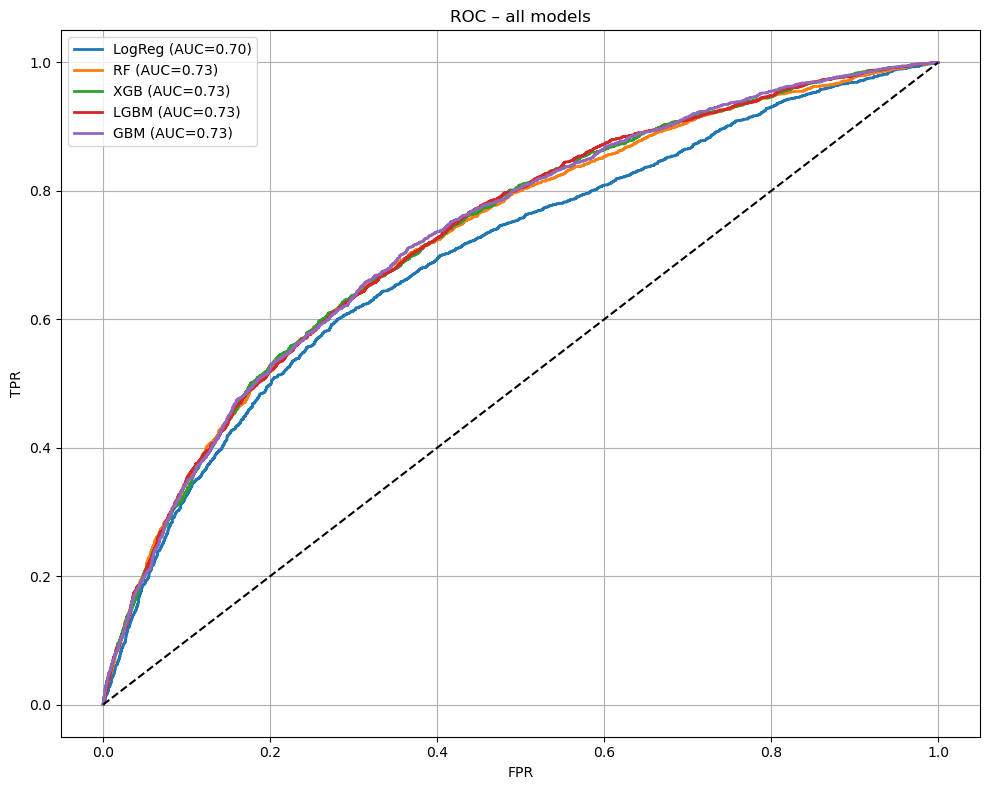

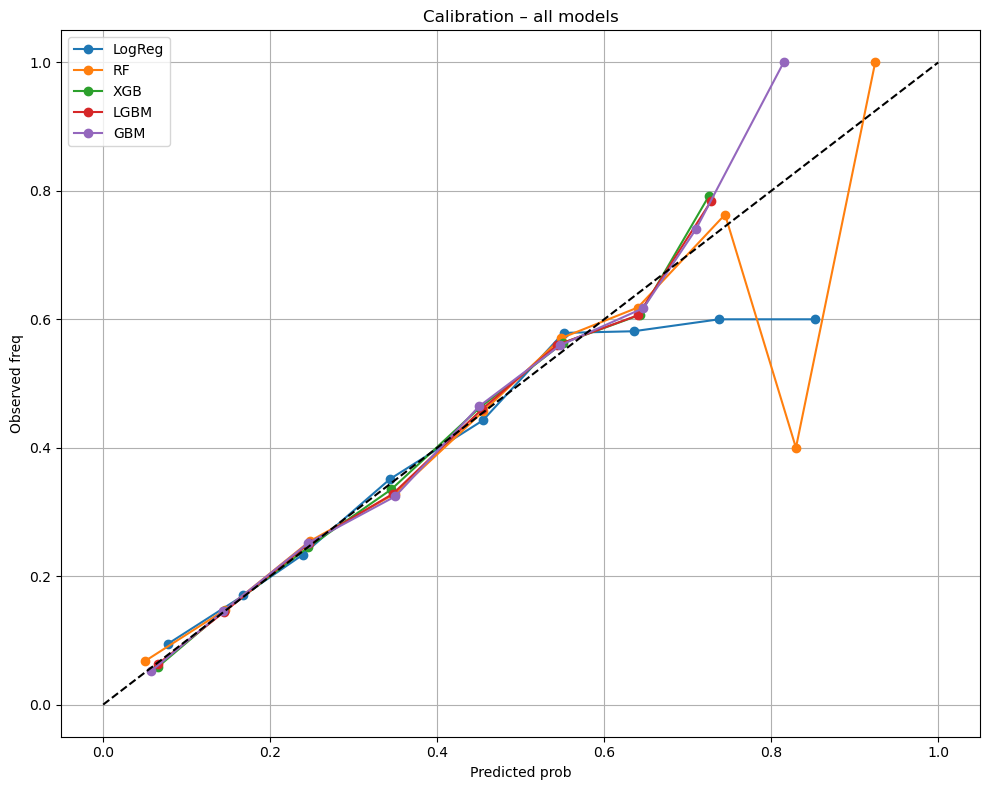

Model,ROC_AUC,Accuracy,F1,Sensitivity,Specificity,BestParams,Estimator
GBM,0.730,0.745,0.382,0.282,0.925,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}","GradientBoostingClassifier(n_estimators=200, subsample=0.8)"
LGBM,0.729,0.746,0.394,0.296,0.921,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}","LGBMClassifier(max_depth=5, subsample=0.8)"
XGB,0.729,0.744,0.378,0.279,0.924,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}","XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric='logloss', feature_types=None, feature_weights=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=0.1, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=5, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)"
RF,0.725,0.742,0.282,0.182,0.959,"{'max_depth': 10, 'n_estimators': 200}","RandomForestClassifier(max_depth=10, n_estimators=200)"
LogReg,0.699,0.739,0.333,0.233,0.935,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}","LogisticRegression(C=0.01, max_iter=3000, solver='liblinear')"


Model,BestThreshold
LogReg,0.280000
RF,0.310000
XGB,0.290000
LGBM,0.300000
GBM,0.250000


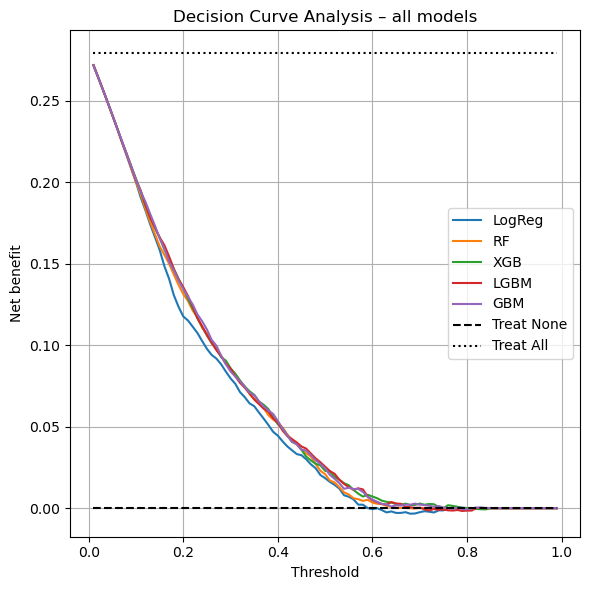

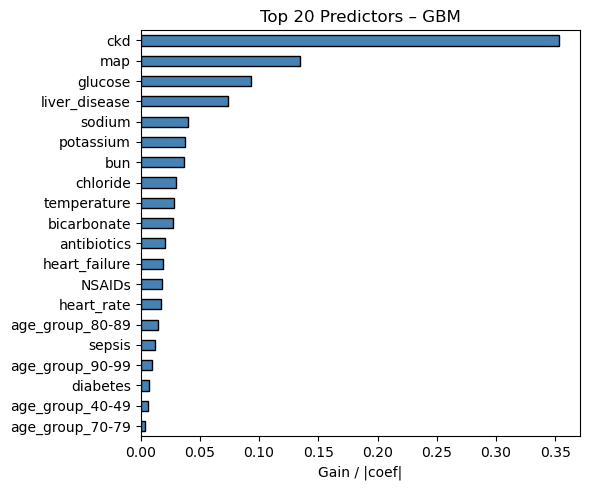

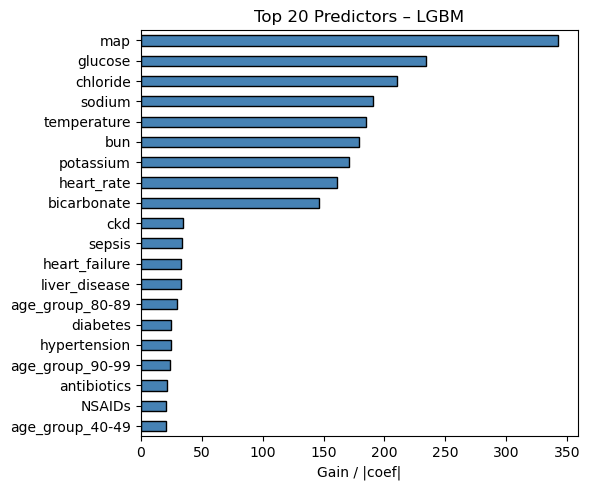

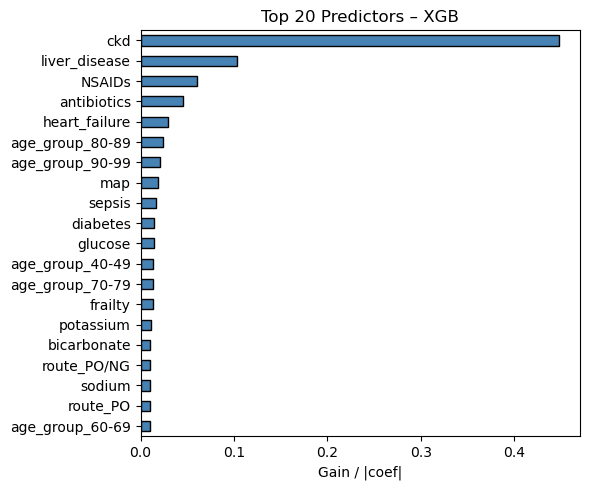

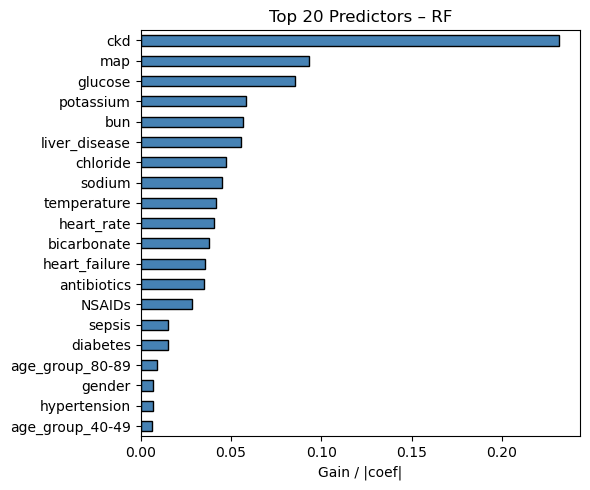

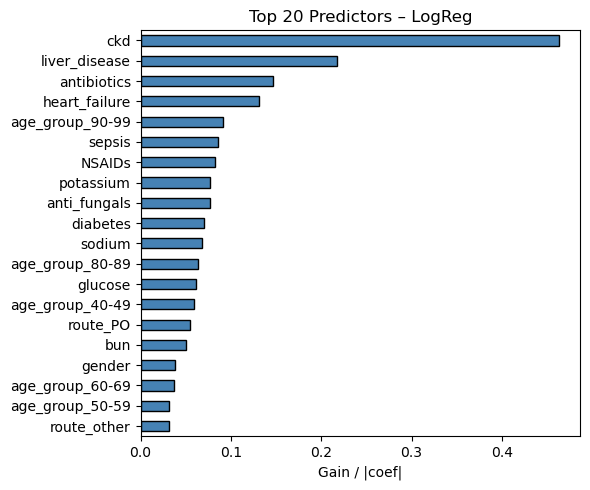

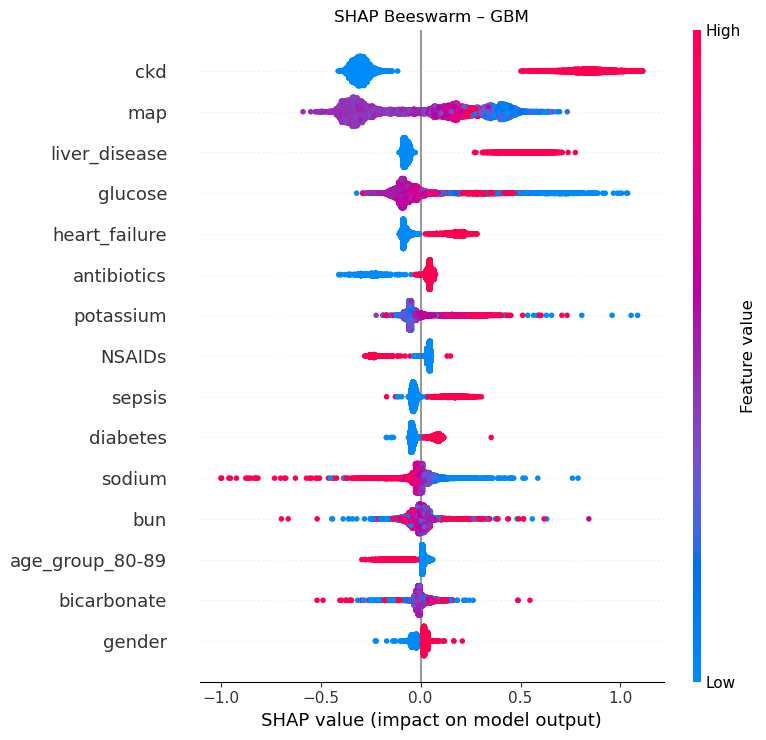

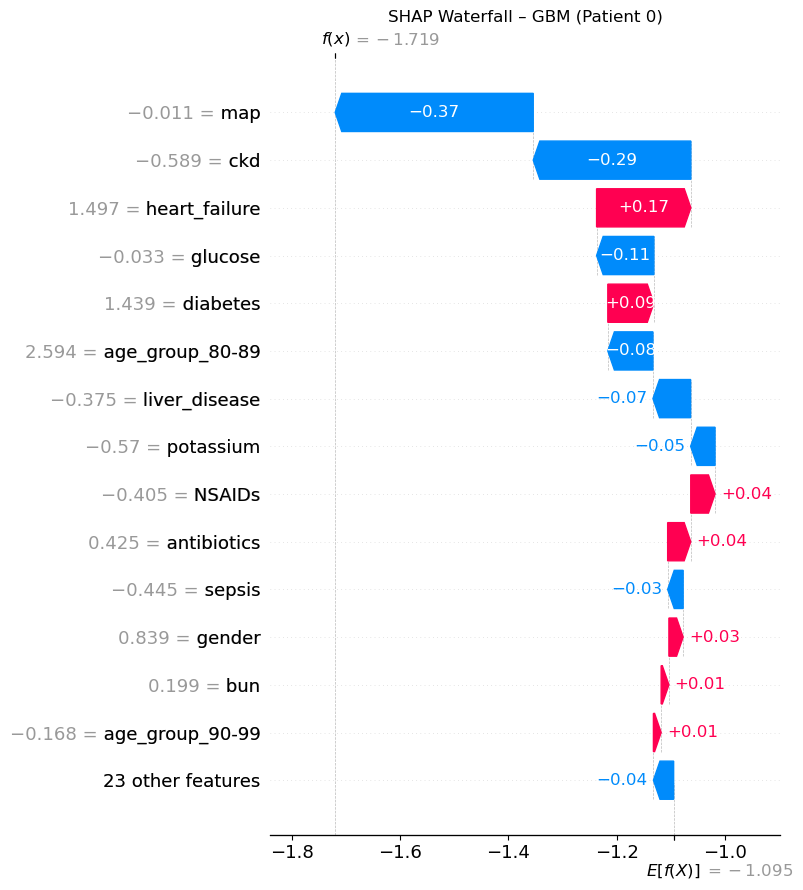

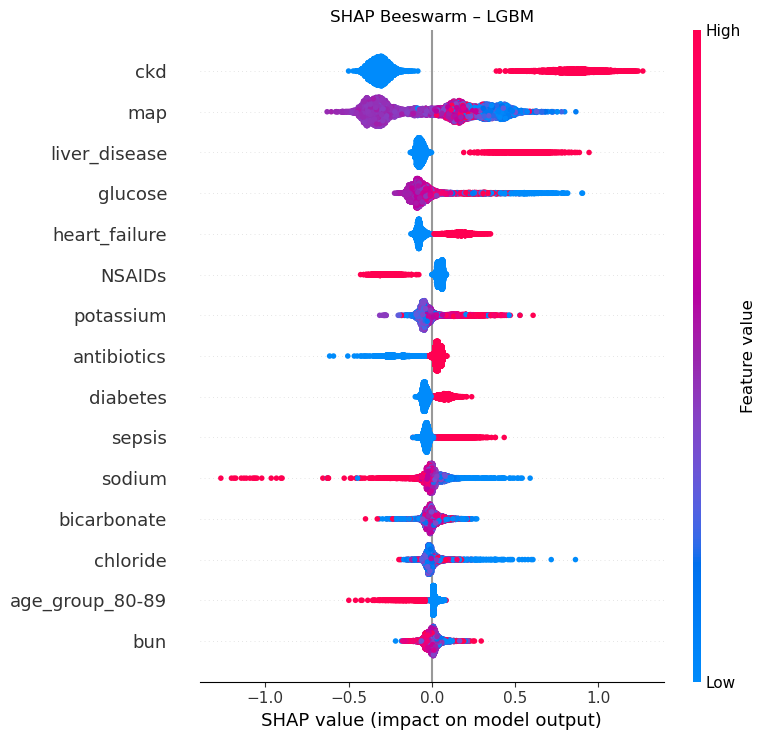

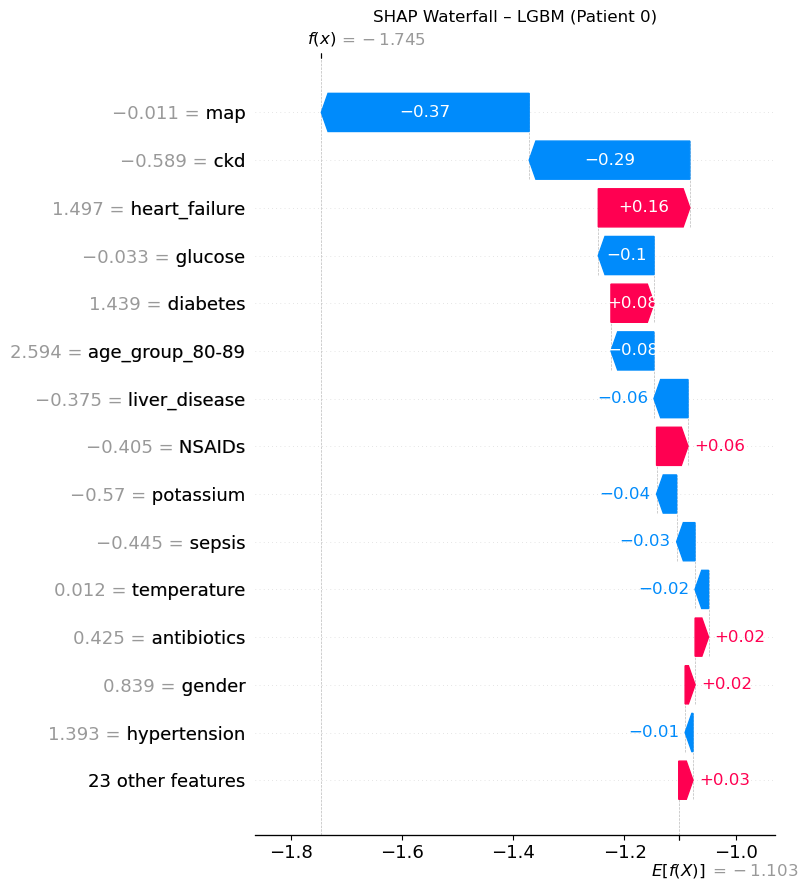

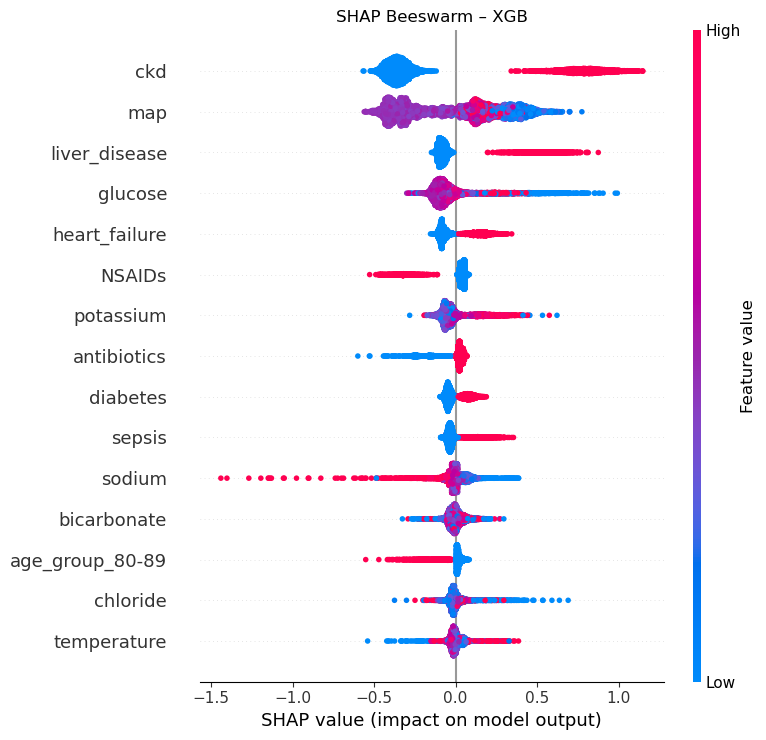

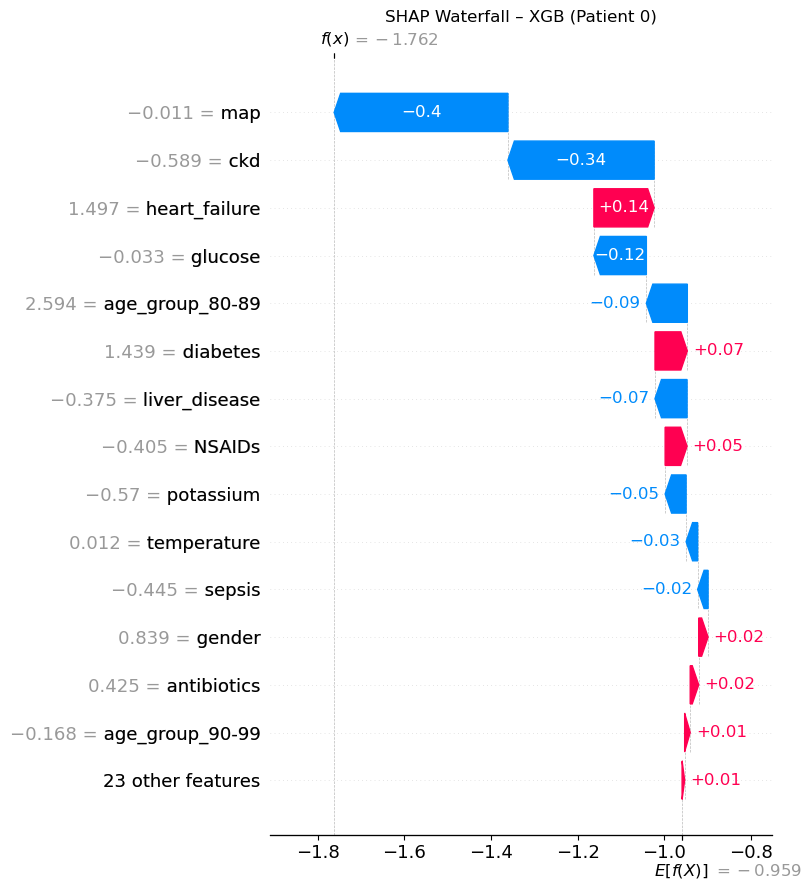

<Figure size 640x480 with 0 Axes>

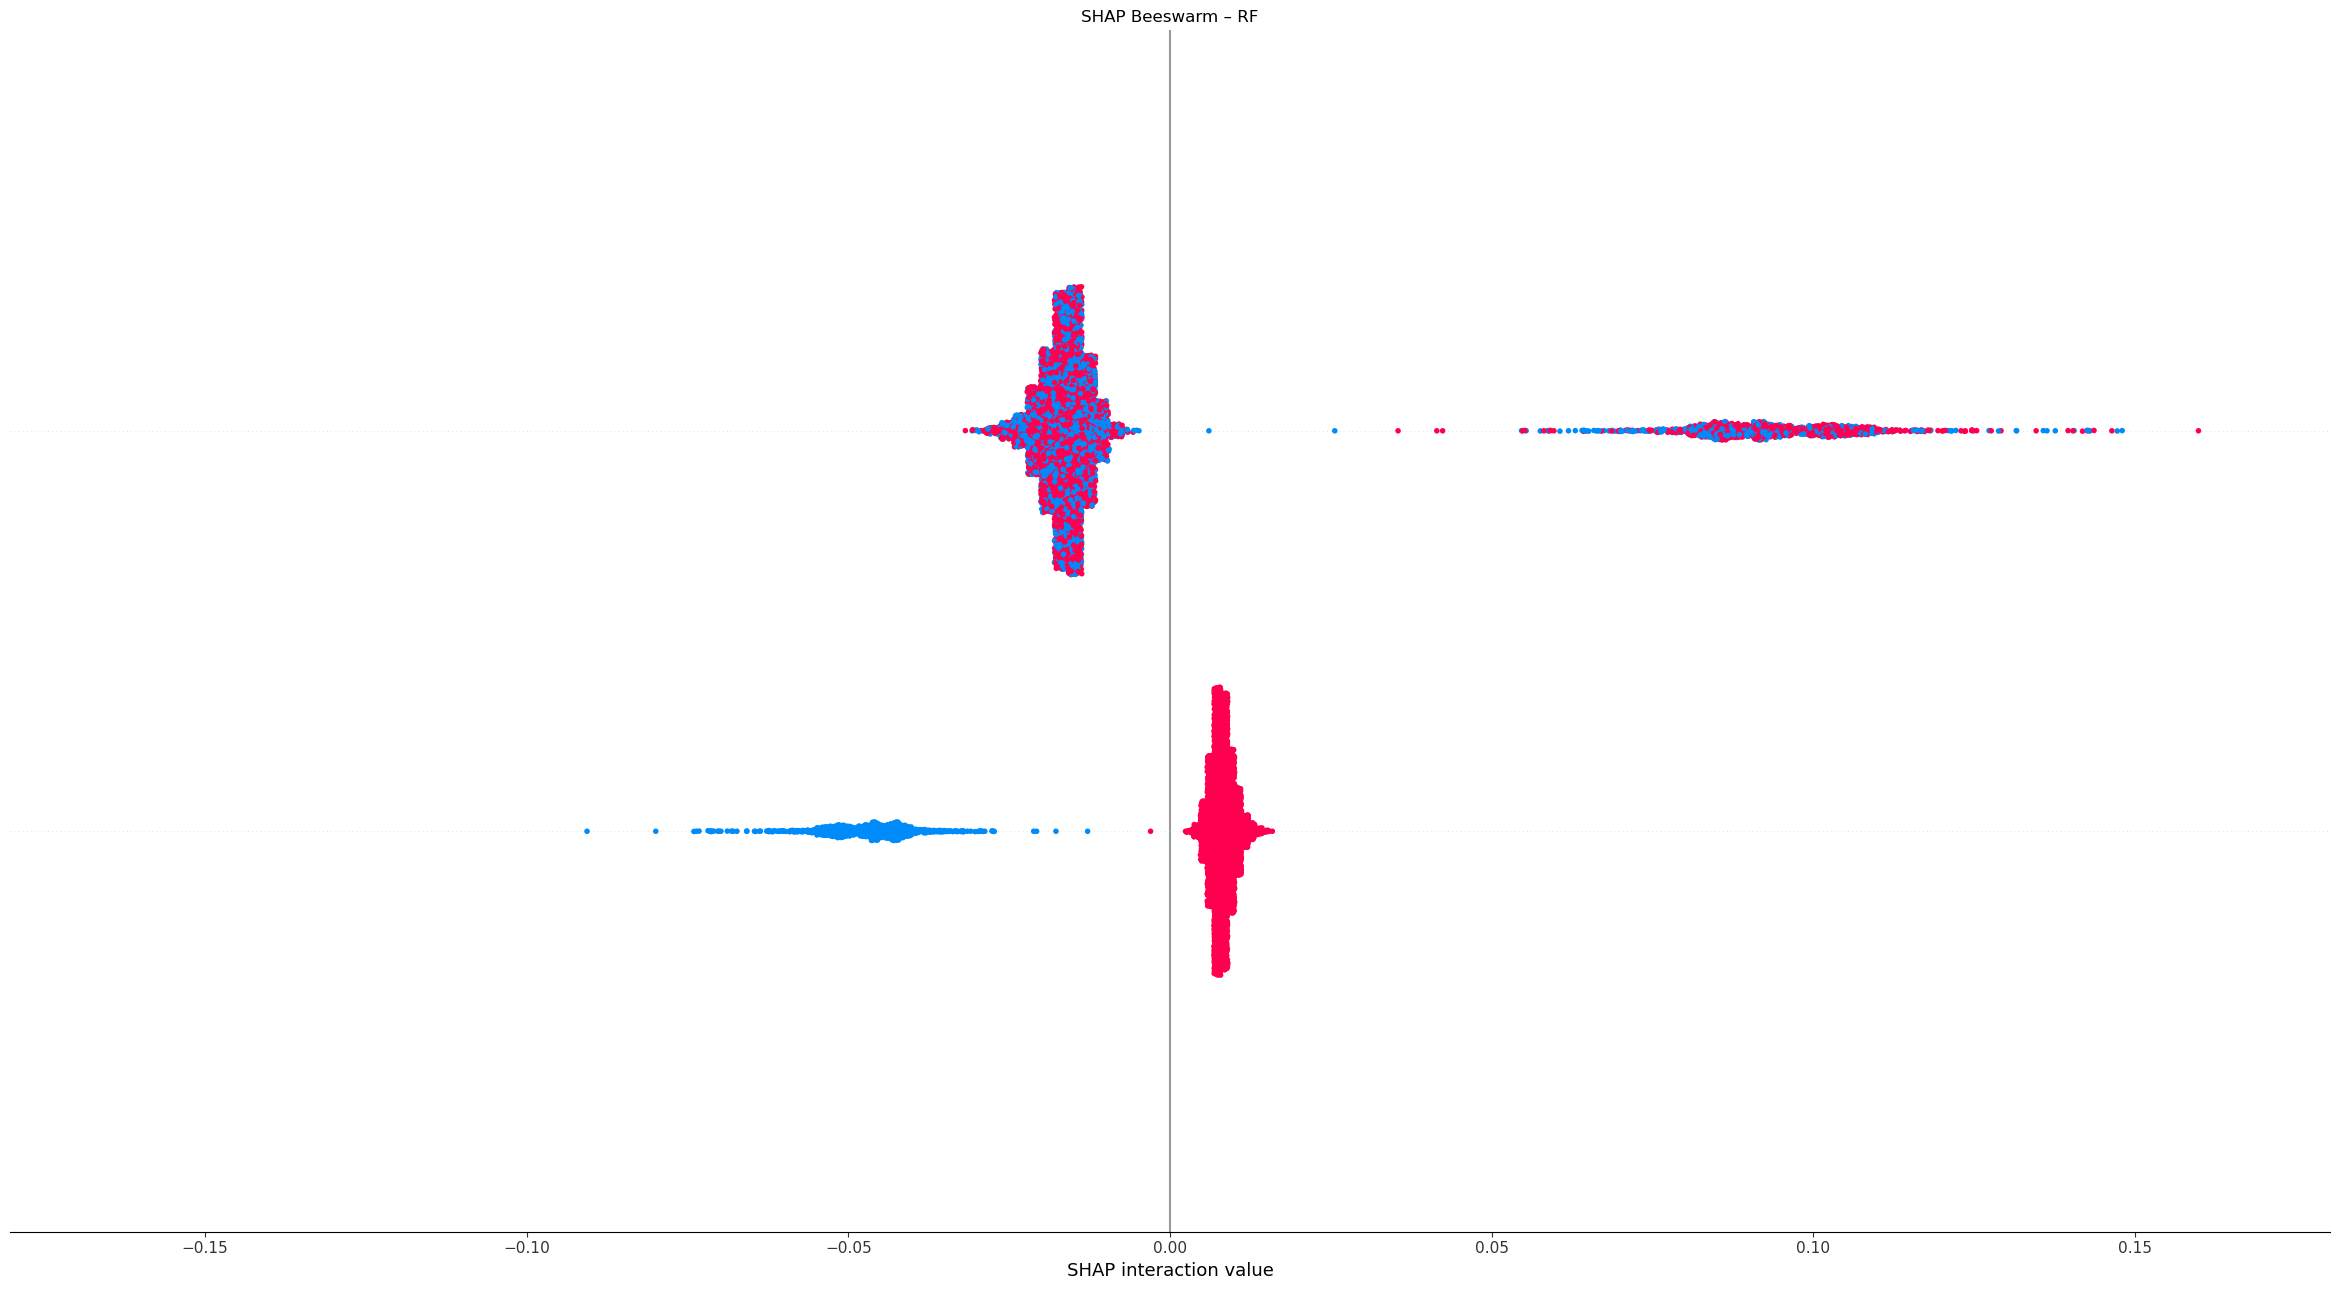

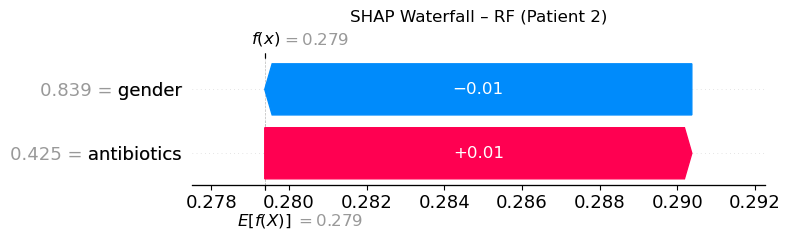

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


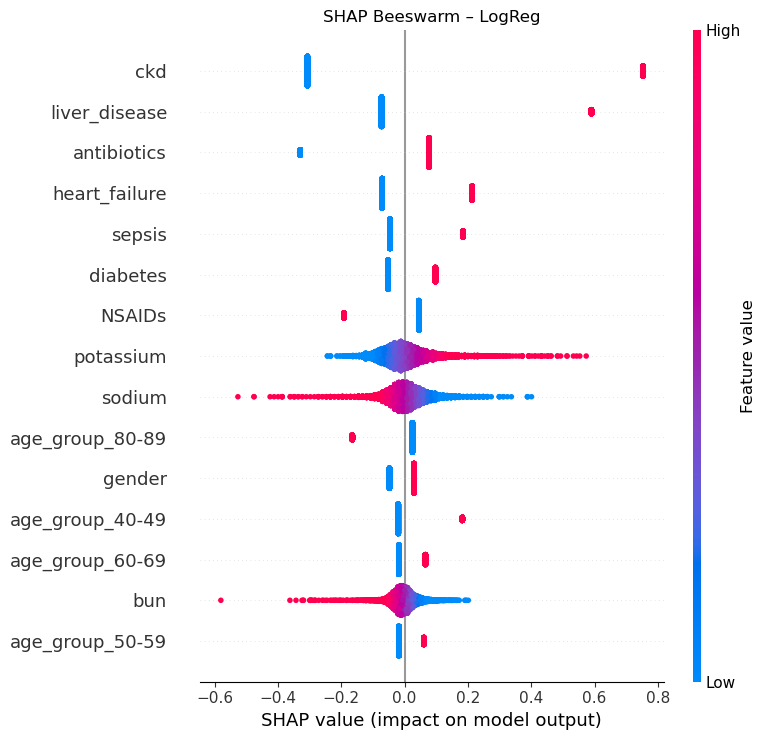

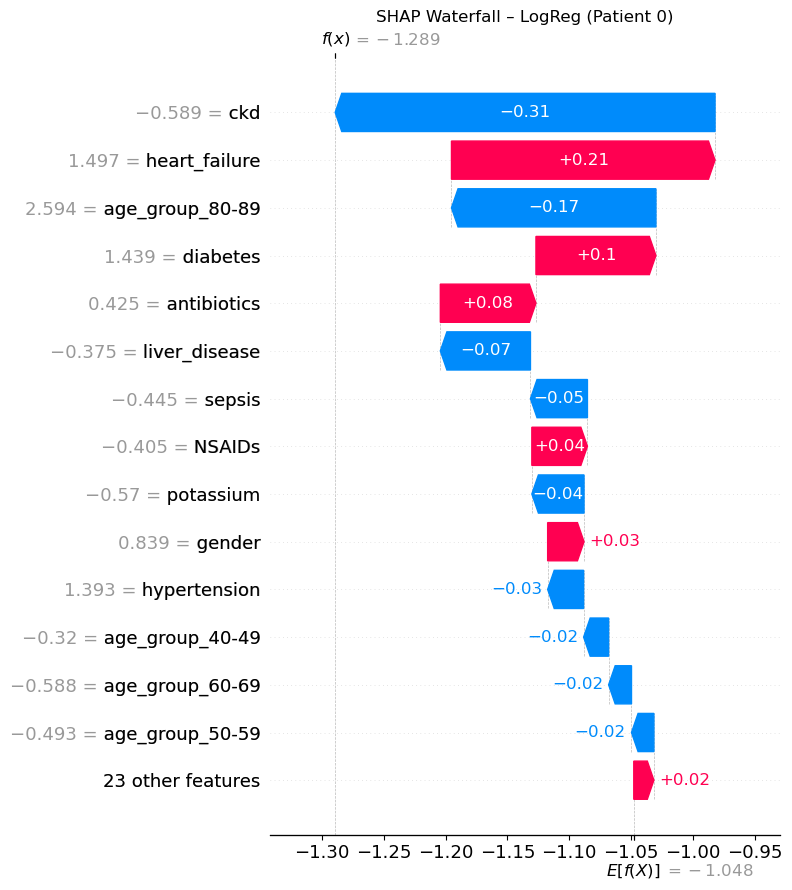

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, recall_score, 
                             confusion_matrix, roc_curve, brier_score_loss)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# 1. Experimental Design
x_columns = [
    'gender', 'antibiotics', 'anti_fungals', 'chemotherapeutic_agents', 'NSAIDs',
    'other', 'bicarbonate', 'bun', 'chloride', 'glucose', 'potassium',
    'sodium', 'heart_rate', 'map', 'temperature', 'ckd', 'diabetes',
    'liver_disease', 'heart_failure', 'hypertension', 'sepsis', 'frailty',
    'route_IM', 'route_IV', 'route_PO', 'route_PO/NG', 'route_PR', 'route_other',
    'age_group_10-19', 'age_group_20-29', 'age_group_30-39', 'age_group_40-49',
    'age_group_50-59', 'age_group_60-69', 'age_group_70-79', 'age_group_80-89', 'age_group_90-99'
]

X_raw = random_patient_df[x_columns].copy()
y = random_patient_df['aki_label'].astype(int)

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X_tr, X_te, y_tr, y_te = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# 2 MODEL GRID: Shyperparameter optimization
models = {
    'LogReg': (LogisticRegression(max_iter=3000),
               {'C':[0.01,0.1,1,10],'penalty':['l2'],'solver':['liblinear']}),
    'RF':    (RandomForestClassifier(),
              {'n_estimators':[100,200],'max_depth':[10,20]}),
    'XGB':   (XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
              {'n_estimators':[100,200],'max_depth':[5,10],
               'learning_rate':[0.01,0.1],'subsample':[0.8,1.0]}),
    'LGBM':  (LGBMClassifier(),
              {'n_estimators':[100,200],'max_depth':[5,10],
               'learning_rate':[0.01,0.1],'subsample':[0.8,1.0]}),
    'GBM':   (GradientBoostingClassifier(),
              {'n_estimators':[100,200],'max_depth':[3,5],
               'learning_rate':[0.01,0.1],'subsample':[0.8,1.0]})
}

# containers
results, thresh_rows, dca_curves = [], [], []
palette = sns.color_palette("tab10", n_colors=len(models))
fig_roc, ax_roc = plt.subplots(figsize=(10,8))
fig_cal, ax_cal = plt.subplots(figsize=(10,8))

# 3 TRAIN, TUNE, METRICS, ROC, CALIBRATION, DCA

for i,(tag,(est,grid)) in enumerate(models.items()):
    print(f"{tag}: GridSearchCV")
    gs   = GridSearchCV(est, grid, cv=5, scoring='roc_auc', n_jobs=-1)
    gs.fit(X_tr, y_tr)
    best = gs.best_estimator_

    proba = best.predict_proba(X_te)[:,1]
    pred  = (proba>=0.5).astype(int)

    roc   = roc_auc_score(y_te, proba)
    acc   = accuracy_score(y_te, pred)
    f1    = f1_score(y_te, pred)
    sens  = recall_score(y_te, pred)
    tn,fp,fn,tp = confusion_matrix(y_te, pred).ravel()
    spec  = tn/(tn+fp)
    results.append([tag, roc, acc, f1, sens, spec, gs.best_params_, best])

    # ROC curve
    fpr,tpr,_ = roc_curve(y_te, proba)
    ax_roc.plot(fpr,tpr,color=palette[i],lw=2,label=f"{tag} (AUC={roc:.2f})")

    # calibration
    calib = CalibratedClassifierCV(best,method='isotonic',cv=5).fit(X_tr,y_tr)
    o,e = calibration_curve(y_te, calib.predict_proba(X_te)[:,1], n_bins=10)
    ax_cal.plot(e,o,'o-',color=palette[i],label=tag)

    # Youden J threshold
    js = [(((proba>=t)&(y_te==1)).sum()/y_te.sum()
           +((proba< t)&(y_te==0)).sum()/(len(y_te)-y_te.sum()) -1 , t)
           for t in np.linspace(0,1,101)]
    thresh_rows.append([tag, max(js)[1]])

    # DCA
    pts = np.linspace(0.01,0.99,99)
    net = [((proba>=p)&(y_te==1)).sum()/len(y_te)
           -((proba>=p)&(y_te==0)).sum()/len(y_te)*p/(1-p) for p in pts]
    dca_curves.append((tag,pts,net,palette[i]))

# finish ROC & calibration figs
ax_roc.plot([0,1],[0,1],'k--'); ax_roc.set(xlabel="FPR",ylabel="TPR",title="ROC – all models")
ax_roc.legend(); ax_roc.grid(); fig_roc.tight_layout()
ax_cal.plot([0,1],[0,1],'k--'); ax_cal.set(xlabel="Predicted prob",ylabel="Observed freq",
                                           title="Calibration – all models")
ax_cal.legend(); ax_cal.grid(); fig_cal.tight_layout(); plt.show()

# tables
metrics_df = (pd.DataFrame(results, columns=[
        'Model','ROC_AUC','Accuracy','F1','Sensitivity','Specificity','BestParams','Estimator'
     ]).sort_values('ROC_AUC',ascending=False).reset_index(drop=True))
thresholds_df = pd.DataFrame(thresh_rows, columns=['Model','BestThreshold'])

display(metrics_df.style.format('{:.3f}', subset=metrics_df.columns[1:6]).hide(axis='index'))
display(thresholds_df.style.hide(axis='index'))

# decision curve
plt.figure(figsize=(6,6))
for tag,pts,net,col in dca_curves:
    plt.plot(pts,net,color=col,label=tag)
plt.plot(pts,[0]*len(pts),'k--',label='Treat None')
plt.plot(pts,[y_te.mean()]*len(pts),'k:',label='Treat All')
plt.title("Decision Curve Analysis – all models"); plt.xlabel("Threshold"); plt.ylabel("Net benefit")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()


# TOP‑20 FEATURE IMPORTANCE  (per every model)
for row in metrics_df.itertuples():
    est, tag = row.Estimator, row.Model
    if hasattr(est,"feature_importances_"):
        imp = pd.Series(est.feature_importances_, index=X_raw.columns)\
                .sort_values(ascending=False).head(20)
    elif hasattr(est,"coef_"):
        imp = pd.Series(np.abs(est.coef_).ravel(), index=X_raw.columns)\
                .sort_values(ascending=False).head(20)
    else:
        continue
    imp.plot(kind='barh',figsize=(6,5),color='steelblue',edgecolor='black')
    plt.gca().invert_yaxis(); plt.title(f"Top 20 Predictors – {tag}")
    plt.xlabel("Gain / |coef|"); plt.tight_layout(); plt.show()


#  SHAP  –  GLOBAL & LOCAL  FOR *ALL* MODELS

%matplotlib inline     

import shap, matplotlib.pyplot as plt, numpy as np, warnings
from scipy.special import expit
warnings.filterwarnings("ignore", message=".*shap values output has changed.*")
shap.initjs()

# ---- SHAP Explanation Function ----
def explain_model(est, X_test, feat_names, mdl_name,
                  max_display=15, min_impact=0.02):

    # Choose explainer type
    if hasattr(est, "feature_importances_"):
        explainer = shap.TreeExplainer(est)
        sv = explainer.shap_values(X_test, check_additivity=False)
        sv = sv[1] if isinstance(sv, list) else sv
    elif hasattr(est, "coef_"):
        explainer = shap.LinearExplainer(est, X_test, feature_perturbation="interventional")
        sv = explainer.shap_values(X_test)
    else:
        print(f"(!) SHAP not supported for {mdl_name}")
        return

    # GLOBAL: SHAP Beeswarm Plot
    shap.summary_plot(sv, X_test, feature_names=feat_names,
                      max_display=max_display, show=False)
    plt.title(f"SHAP Beeswarm – {mdl_name}")
    plt.tight_layout()
    plt.show()

    # LOCAL: SHAP Waterfall Plot (1 patient)
    if sv.ndim == 3:
        sv_pos = sv[:, 1, :] if sv.shape[1] > 1 else sv[:, 0, :]
    else:
        sv_pos = sv

    impacts = np.abs(sv_pos).sum(axis=1)
    idx = int(np.where(impacts >= min_impact)[0][0]) if (impacts >= min_impact).any() else impacts.argmax()

    base_val = explainer.expected_value
    if isinstance(base_val, (list, np.ndarray)):
        base_val = base_val[-1]

    shap.plots.waterfall(
        shap.Explanation(values        = sv_pos[idx],
                         base_values   = base_val,
                         data          = X_test[idx],
                         feature_names = feat_names),
        max_display=max_display, show=False)
    plt.title(f"SHAP Waterfall – {mdl_name} (Patient {idx})")
    plt.tight_layout()
    plt.show()

# ---- Run for All Models in metrics_df ----
for mdl_name, est in zip(metrics_df["Model"], metrics_df["Estimator"]):
    explain_model(est, X_te, X_raw.columns, mdl_name)


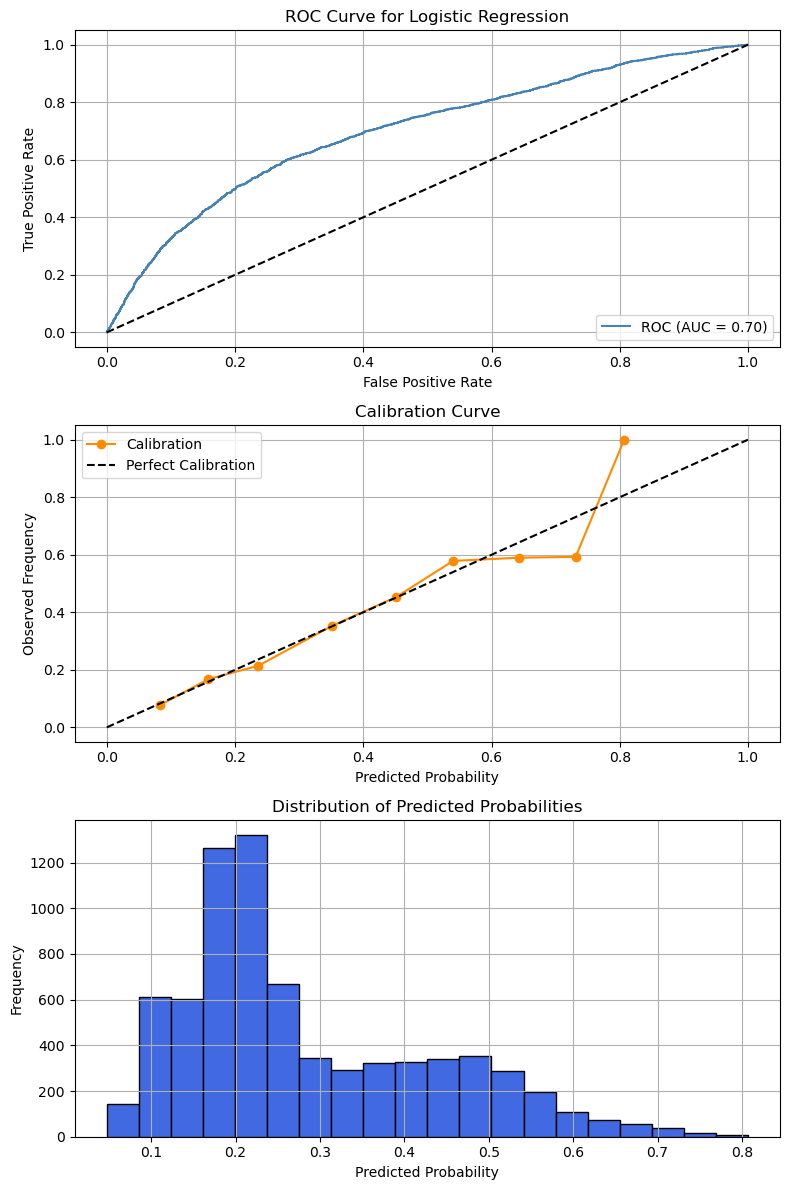

In [139]:
from sklearn.calibration import calibration_curve

# === Select the weak model: Logistic Regression ===
logreg_row = metrics_df[metrics_df['Model'] == 'LogReg']
logreg_model = logreg_row['Estimator'].values[0]
logreg_probs = logreg_model.predict_proba(X_te)[:, 1]
logreg_auc = roc_auc_score(y_te, logreg_probs)
fpr, tpr, _ = roc_curve(y_te, logreg_probs)
obs_freq, pred_prob = calibration_curve(y_te, logreg_probs, n_bins=10)

# === Plot all: ROC, Calibration, Histogram ===
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# ROC
axes[0].plot(fpr, tpr, label=f"ROC (AUC = {logreg_auc:.2f})", color='steelblue')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[0].set_title("ROC Curve for Logistic Regression")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Calibration
axes[1].plot(pred_prob, obs_freq, 'o-', color='darkorange', label='Calibration')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfect Calibration')
axes[1].set_title("Calibration Curve")
axes[1].set_xlabel("Predicted Probability")
axes[1].set_ylabel("Observed Frequency")
axes[1].legend(loc="upper left")
axes[1].grid()

# Histogram of predicted probabilities
axes[2].hist(logreg_probs, bins=20, edgecolor='black', color='royalblue')
axes[2].set_title("Distribution of Predicted Probabilities")
axes[2].set_xlabel("Predicted Probability")
axes[2].set_ylabel("Frequency")
axes[2].grid()

plt.tight_layout()
plt.show()



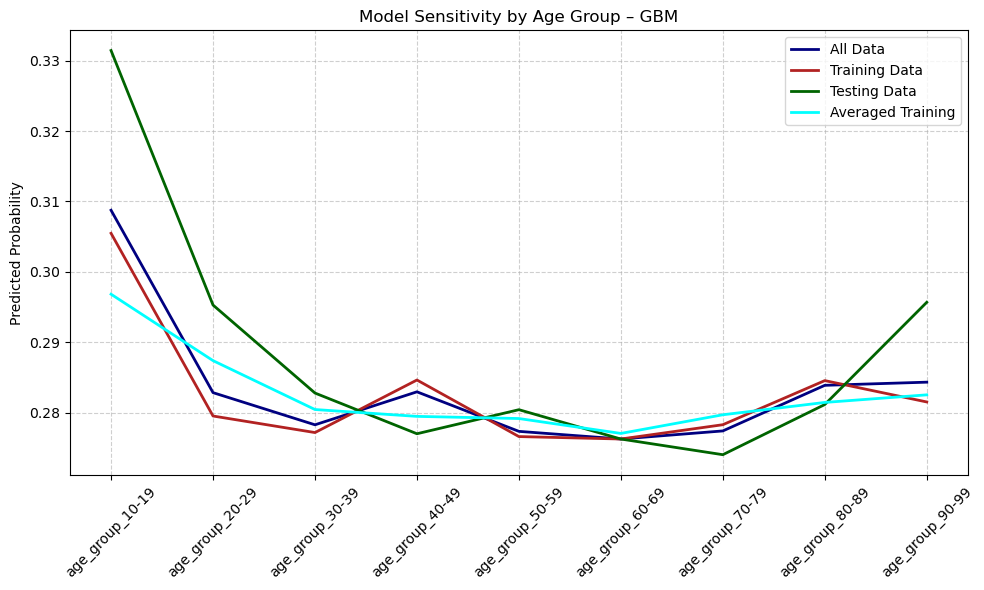

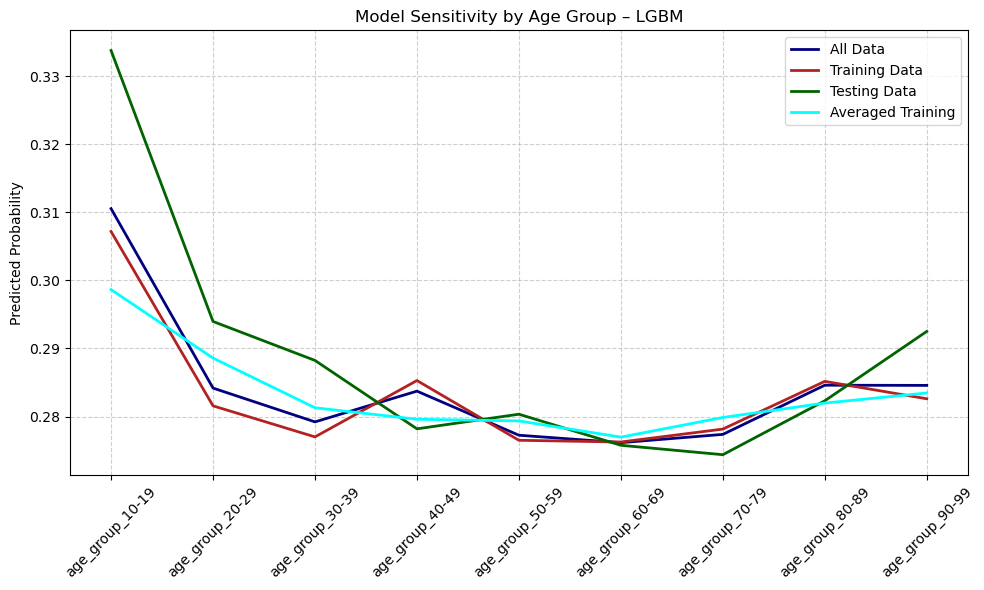

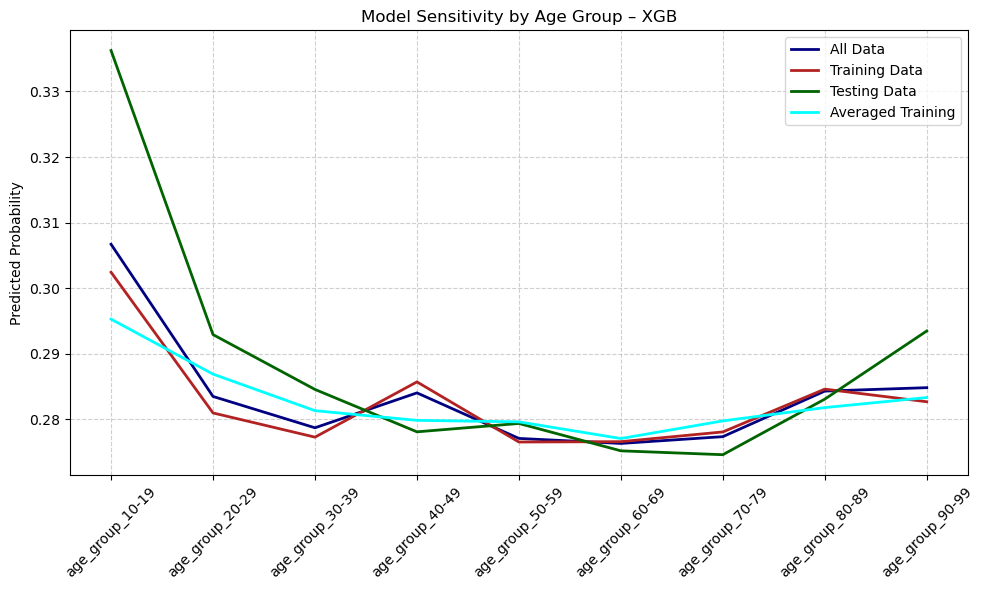

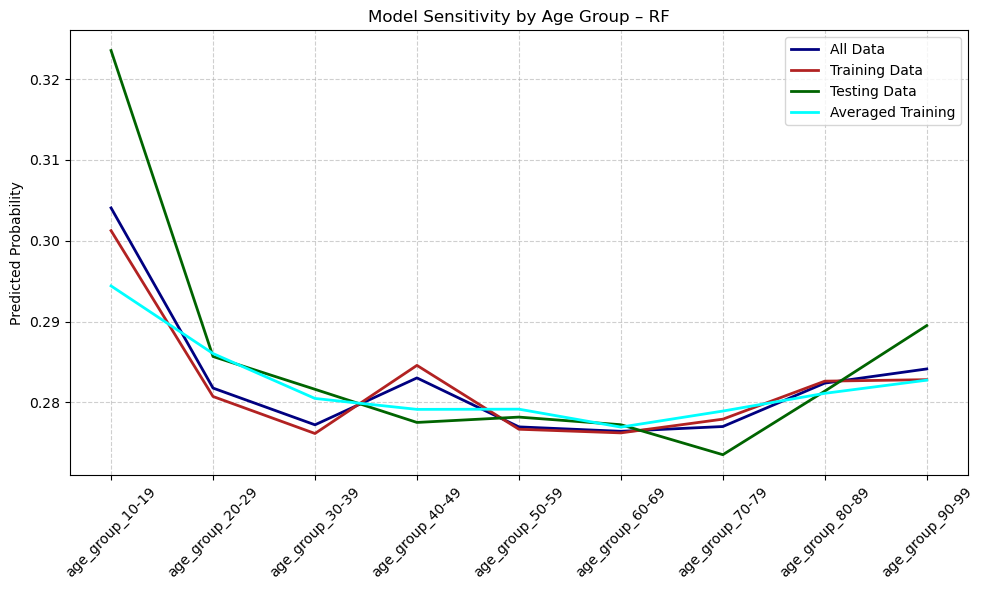

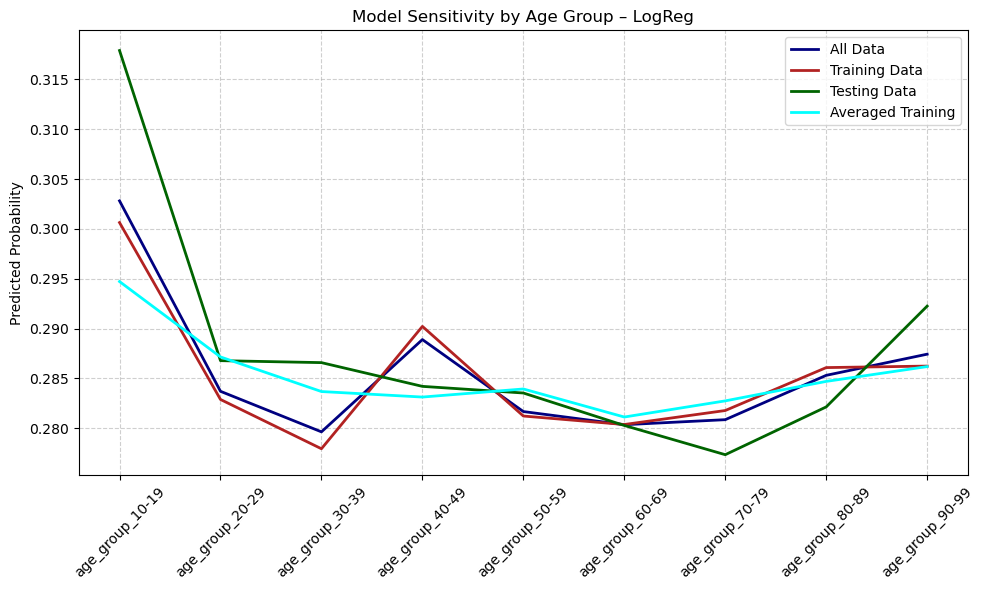

In [101]:
##Global Sensitivity Analysis

##Global Sensitivity Analysis
# Define age group columns
age_cols = [col for col in random_patient_df.columns if col.startswith('age_group_')]

# Split data
df_train = random_patient_df.iloc[:X_tr.shape[0]].copy()
df_test  = random_patient_df.iloc[X_tr.shape[0]:].copy()

# Loop through each model
for model_name, model in zip(metrics_df['Model'], metrics_df['Estimator']):
    # Predict probabilities
    random_patient_df['y_prob'] = model.predict_proba(np.vstack([X_tr, X_te]))[:, 1]
    df_train['y_prob'] = model.predict_proba(X_tr)[:, 1]
    df_test['y_prob'] = model.predict_proba(X_te)[:, 1]

    # Initialize storage
    all_data = {}
    train_data = {}
    test_data = {}

    for col in age_cols:
        all_data[col] = random_patient_df[random_patient_df[col] == 1]['y_prob'].mean()
        train_data[col] = df_train[df_train[col] == 1]['y_prob'].mean()
        test_data[col] = df_test[df_test[col] == 1]['y_prob'].mean()

    # Sort age groups
    def sort_key(col):
        try:
            return int(col.split('_')[-1].split('-')[0])
        except:
            return 999

    sorted_cols = sorted(age_cols, key=sort_key)
    x_labels = sorted_cols
    all_vals = [all_data[col] for col in sorted_cols]
    train_vals = [train_data[col] for col in sorted_cols]
    test_vals = [test_data[col] for col in sorted_cols]

    # Smoothed version of training data (rolling average)
    from scipy.ndimage import uniform_filter1d
    avg_train_vals = uniform_filter1d(train_vals, size=3, mode='nearest')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, all_vals, label='All Data', color='navy', linewidth=2)
    plt.plot(x_labels, train_vals, label='Training Data', color='firebrick', linewidth=2)
    plt.plot(x_labels, test_vals, label='Testing Data', color='darkgreen', linewidth=2)
    plt.plot(x_labels, avg_train_vals, label='Averaged Training', color='cyan', linewidth=2)

    plt.xticks(rotation=45)
    plt.ylabel("Predicted Probability")
    plt.title(f"Model Sensitivity by Age Group – {model_name}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


── Threshold sweep for GBM


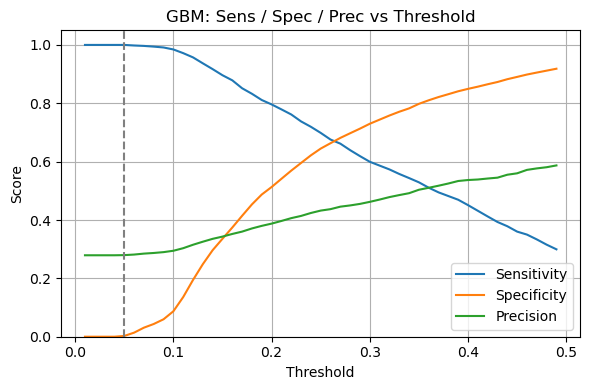


── Threshold sweep for LGBM


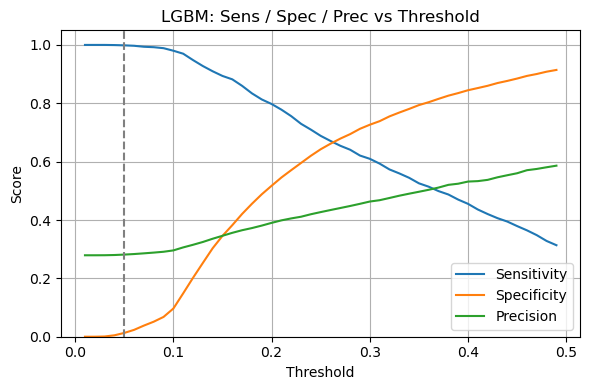


── Threshold sweep for XGB


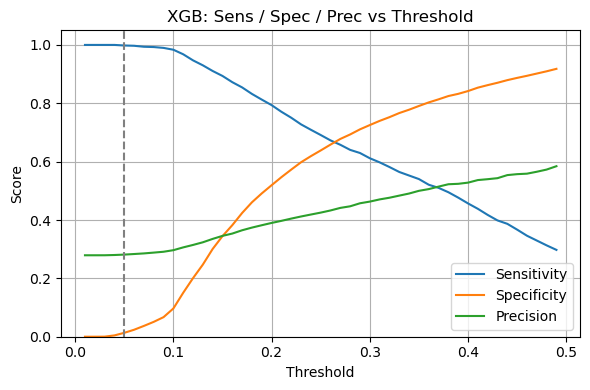


── Threshold sweep for RF


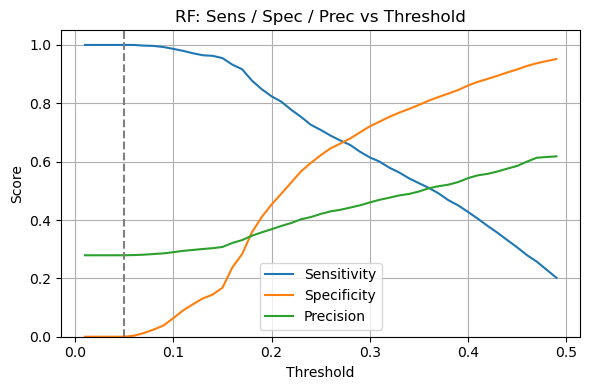


── Threshold sweep for LogReg


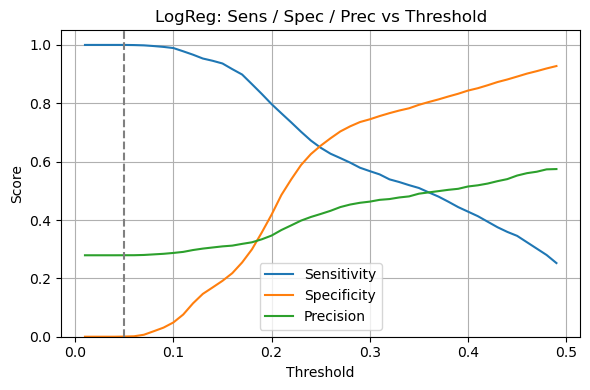

Model,ROC_AUC,Accuracy,F1,Sensitivity,Specificity,BestParams,Estimator
GBM,0.730,0.745,0.382,0.282,0.925,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}","GradientBoostingClassifier(n_estimators=200, subsample=0.8)"
LGBM,0.729,0.746,0.394,0.296,0.921,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}","LGBMClassifier(max_depth=5, subsample=0.8)"
XGB,0.729,0.744,0.378,0.279,0.924,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}","XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric='logloss', feature_types=None, feature_weights=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=0.1, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=5, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)"
RF,0.725,0.742,0.282,0.182,0.959,"{'max_depth': 10, 'n_estimators': 200}","RandomForestClassifier(max_depth=10, n_estimators=200)"
LogReg,0.699,0.739,0.333,0.233,0.935,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}","LogisticRegression(C=0.01, max_iter=3000, solver='liblinear')"


Model,BestThreshold
LogReg,0.280000
RF,0.310000
XGB,0.290000
LGBM,0.300000
GBM,0.250000


Model,Train_AUC,Test_AUC
GBM,0.763,0.730
LGBM,0.783,0.729
XGB,0.782,0.729
RF,0.800,0.725
LogReg,0.704,0.699


In [103]:
#  THRESHOLD SWEEP  (all models) 
thresholds  = np.arange(0.01, 0.5, 0.01)
thresh_dict = {}                    
auc_rows    = []                     

for mdl_name, est in zip(metrics_df['Model'], metrics_df['Estimator']):
    print(f"\n── Threshold sweep for {mdl_name}")
    y_test_prob  = est.predict_proba(X_te)[:, 1]
    y_train_prob = est.predict_proba(X_tr)[:, 1]
    sweep_rows   = []

    # loop through thresholds
    for t in thresholds:
        y_pred = (y_test_prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_te, y_pred).ravel()
        sens = tp / (tp + fn) if (tp + fn) else 0
        spec = tn / (tn + fp) if (tn + fp) else 0
        prec = tp / (tp + fp) if (tp + fp) else 0
        sweep_rows.append([t, sens, spec, prec, tp, fp, fn, tn])

    df_t = pd.DataFrame(sweep_rows, columns=[
        "Threshold", "Sensitivity", "Specificity",
        "Precision", "TP", "FP", "FN", "TN"
    ])
    thresh_dict[mdl_name] = df_t

    # ----- plot curve -----
    plt.figure(figsize=(6,4))
    plt.plot(df_t['Threshold'], df_t['Sensitivity'],  label='Sensitivity')
    plt.plot(df_t['Threshold'], df_t['Specificity'],  label='Specificity')
    plt.plot(df_t['Threshold'], df_t['Precision'],    label='Precision')
    plt.axvline(0.05, ls='--', c='grey')
    plt.title(f"{mdl_name}: Sens / Spec / Prec vs Threshold")
    plt.xlabel("Threshold"); plt.ylabel("Score")
    plt.ylim(0,1.05); plt.grid(); plt.legend(); plt.tight_layout(); plt.show()

    # ----- Youden‑J best threshold -----
    df_t['YoudenJ'] = df_t['Sensitivity'] + df_t['Specificity'] - 1
    best_row = df_t.loc[df_t['YoudenJ'].idxmax()]
    thresholds_df.loc[len(thresholds_df)] = [mdl_name, best_row['Threshold']]

    # ----- AUC gap ( to check if over‑fit ?) -----
    auc_rows.append([mdl_name,
                     roc_auc_score(y_tr, y_train_prob),
                     roc_auc_score(y_te, y_test_prob)])


#  DISPLAY TABLES 

num_cols = metrics_df.select_dtypes(include=[np.number]).columns

display(
    metrics_df.style
       .format('{:.3f}', subset=num_cols)  
       .hide(axis='index')
)

display(
    thresholds_df.drop_duplicates('Model')
       .style.hide(axis='index')
)

auc_df = pd.DataFrame(auc_rows, columns=['Model','Train_AUC','Test_AUC'])
display(auc_df.style.format({'Train_AUC':'{:.3f}','Test_AUC':'{:.3f}'})
                .hide(axis='index'))



Fixed Threshold (0.05)


Model,Threshold,Flagged,Total,FP,TN,TP,FN,Sensitivity,Precision
GBM,0.05,7366,7380,5306,14,2060,0,1.000,0.280
LGBM,0.05,7308,7380,5251,69,2057,3,0.999,0.281
XGB,0.05,7305,7380,5249,71,2056,4,0.998,0.281
RF,0.05,7379,7380,5319,1,2060,0,1.000,0.279
LogReg,0.05,7377,7380,5317,3,2060,0,1.000,0.279


Optimal Threshold (per model)


Model,Threshold,Flagged,Total,FP,TN,TP,FN,Sensitivity,Precision
GBM,0.25,3329,7380,1890,3430,1439,621,0.699,0.432
LGBM,0.30,2711,7380,1455,3865,1256,804,0.610,0.463
XGB,0.29,2836,7380,1539,3781,1297,763,0.630,0.457
RF,0.31,2634,7380,1398,3922,1236,824,0.600,0.469
LogReg,0.28,2713,7380,1484,3836,1229,831,0.597,0.453


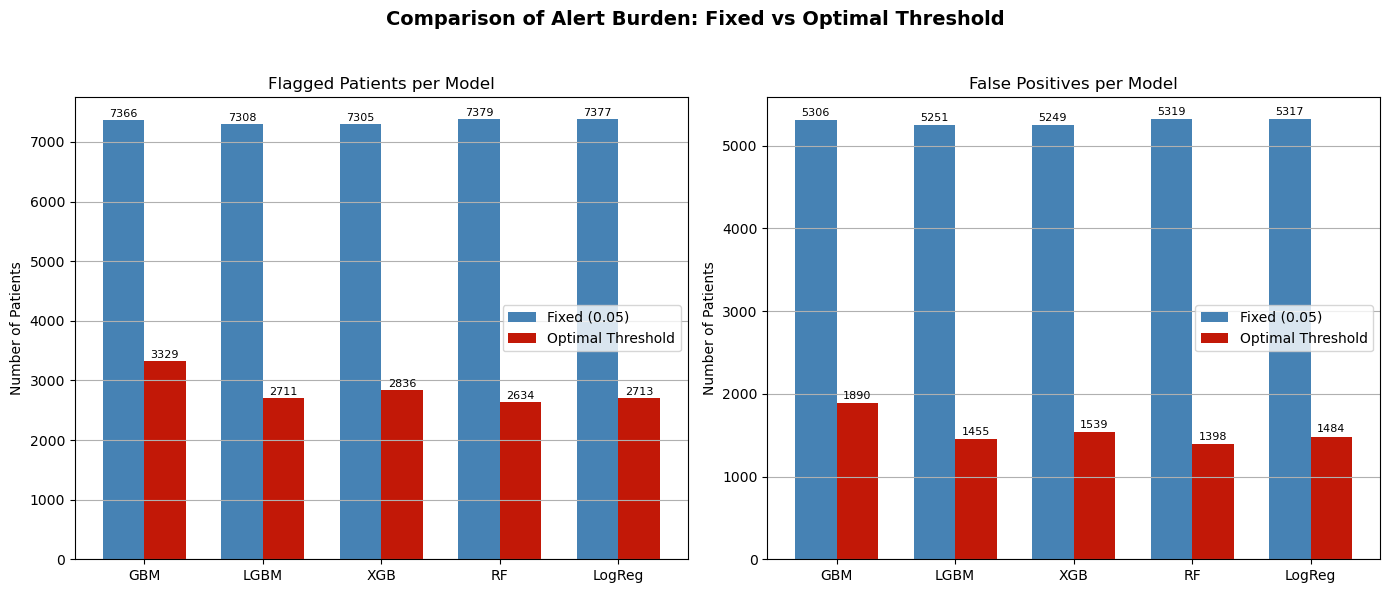

In [105]:
#Generate Summary Tables
summary_fixed = []
summary_optimal = []

for mdl_name, est in zip(metrics_df['Model'], metrics_df['Estimator']):
    y_prob = est.predict_proba(X_te)[:, 1]

    df_thresh = thresh_dict[mdl_name].copy()
    df_thresh['YoudenJ'] = df_thresh['Sensitivity'] + df_thresh['Specificity'] - 1
    best_thresh = df_thresh.loc[df_thresh['YoudenJ'].idxmax(), 'Threshold']

    for label, threshold in [('Fixed', 0.05), ('Optimal', best_thresh)]:
        y_pred = (y_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_te, y_pred).ravel()
        sens = tp / (tp + fn) if (tp + fn) else 0
        prec = tp / (tp + fp) if (tp + fp) else 0
        row = [mdl_name, round(threshold, 2), tp + fp, len(y_te),
               fp, tn, tp, fn, round(sens, 3), round(prec, 3)]
        if label == 'Fixed':
            summary_fixed.append(row)
        else:
            summary_optimal.append(row)

columns = ["Model", "Threshold", "Flagged", "Total", "FP", "TN", "TP", "FN", "Sensitivity", "Precision"]
df_fixed = pd.DataFrame(summary_fixed, columns=columns)
df_optimal = pd.DataFrame(summary_optimal, columns=columns)

# Step 2: Display Tables
print("Fixed Threshold (0.05)")
display(df_fixed.style.format({'Threshold':'{:.2f}', 'Sensitivity':'{:.3f}', 'Precision':'{:.3f}'}).hide(axis='index'))

print("Optimal Threshold (per model)")
display(df_optimal.style.format({'Threshold':'{:.2f}', 'Sensitivity':'{:.3f}', 'Precision':'{:.3f}'}).hide(axis='index'))

# Step 3: Plot Comparison – Alert Burden

models = df_fixed['Model'].tolist()
x = np.arange(len(models))
width = 0.35
cherry_red = '#C21807'

fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Only 2 subplots (no empty one)

# Plot 1 – Flagged Patients
bars1a = axs[0].bar(x - width/2, df_fixed['Flagged'], width, label='Fixed (0.05)', color='steelblue')
bars1b = axs[0].bar(x + width/2, df_optimal['Flagged'], width, label='Optimal Threshold', color=cherry_red)
axs[0].set_title("Flagged Patients per Model", fontsize=12)
axs[0].set_ylabel("Number of Patients")
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(axis='y')

for bar in bars1a + bars1b:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', fontsize=8)

# Plot 2 – False Positives
bars2a = axs[1].bar(x - width/2, df_fixed['FP'], width, label='Fixed (0.05)', color='steelblue')
bars2b = axs[1].bar(x + width/2, df_optimal['FP'], width, label='Optimal Threshold', color=cherry_red)
axs[1].set_title("False Positives per Model", fontsize=12)
axs[1].set_ylabel("Number of Patients")
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(axis='y')

for bar in bars2a + bars2b:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', fontsize=8)

plt.suptitle("Comparison of Alert Burden: Fixed vs Optimal Threshold", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

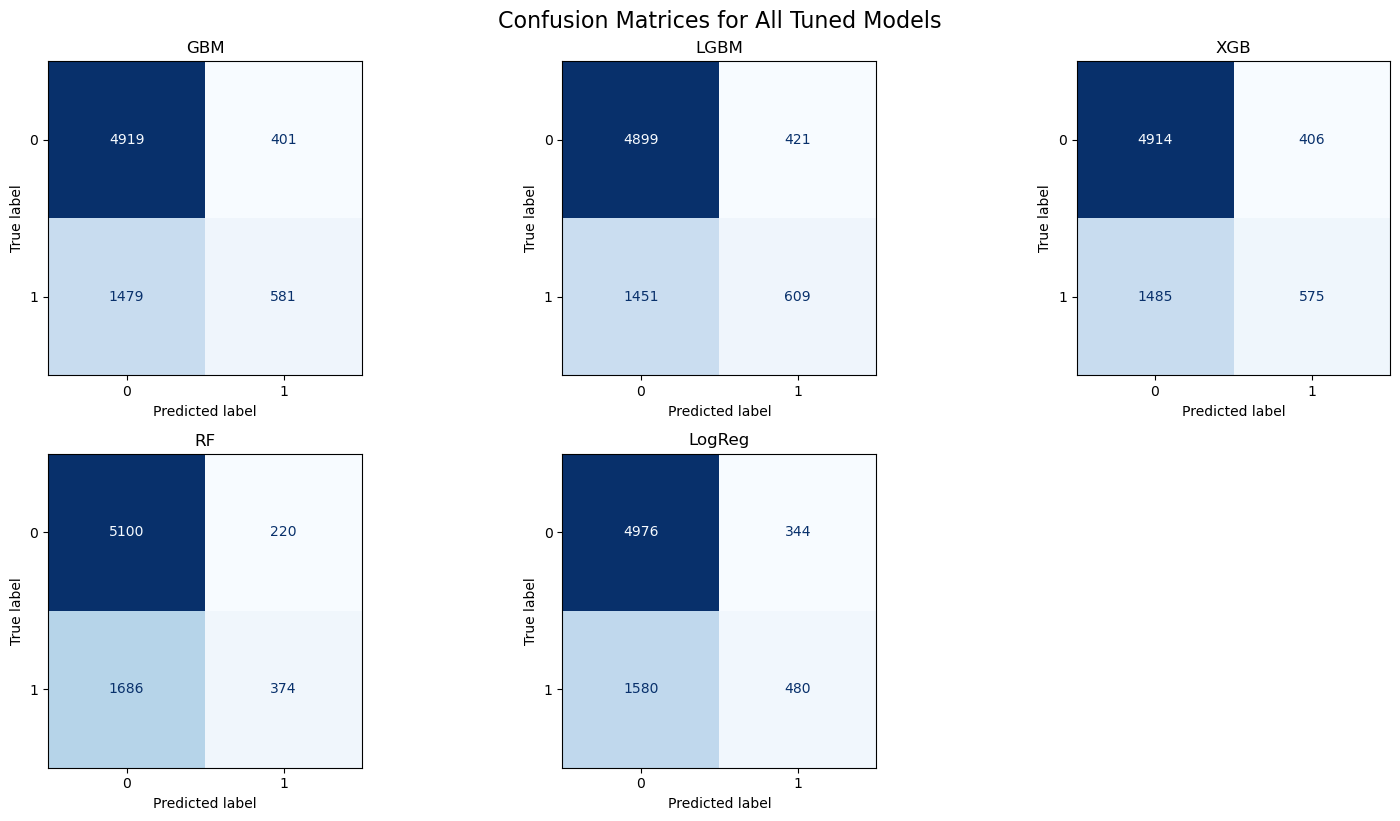

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use best estimators from metrics_df
best_models = metrics_df['Estimator']
model_names = metrics_df['Model']

# Set layout for subplots
n_models = len(best_models)
cols = 3
rows = (n_models // cols) + int(n_models % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot confusion matrices
for i, (model, name) in enumerate(zip(best_models, model_names)):
    ConfusionMatrixDisplay.from_estimator(
        model, X_te, y_te,
        ax=axes[i], cmap='Blues', colorbar=False
    )
    axes[i].set_title(name, fontsize=12)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Tuned Models", fontsize=16, y=1.02)
plt.show()


## **Conclusions: 
This study developed and evaluated several machine learning models to predict the risk of Acute Kidney Injury (AKI) in ICU patients exposed to nephrotoxic medications, using the MIMIC-IV database. Despite modest discriminative performance (ROC AUC ~0.70–0.73), the models demonstrated acceptable calibration, particularly in the LightGBM model, and provided clinically meaningful insights through decision curve analysis.
